# Part 1

In [111]:
!pip install gymnasium


In [1]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from matplotlib.patches import Rectangle
import random
import warnings
warnings.filterwarnings("ignore")
import random
import seaborn as sns


In [2]:
#Environment defining:
# implementing tom and jerry environment using this class
class TomJerryEnvironment(gym.Env): 
    def __init__(self, def_env_type,n,maximum_tsteps): 
        self.type_of_environment = def_env_type
        self.maximum_steps = maximum_tsteps
        self.width_of_environment = 6
        self.height_of_environment = 6
        self.tstep = 0
        
        self.observe = spaces.Discrete(n)
        self.number_actions = spaces.Discrete(4)

        self.position_of_jerry = [0,0]
        self.icecream_pos = [  [2, 2], [3, 0],[3,2],
                                       [5,3], [2,1] , [5, 5],[0, 3], [0, 1] , [1, 4]]
        self.cheese_pos = [3, 4]
        self.cheese_quantity = 1
        self.trap_pos = [[2, 0],[1,2],[3,1],[3,3], [4, 2], [4, 4], [5, 1],[3,5], [1, 0], [1, 3], [0, 5], [2, 5]]
        self.tom_pos = [2, 3]
        self.points = 0
        self.points_dict = {}
        i = 0
        while i < len(self.icecream_pos):
            row = self.icecream_pos[i]
            self.points_dict[tuple(row)] = 3
            i += 1

        self.points_dict[tuple([3, 4])] = 10

        i = 0
        while i < len(self.trap_pos):
            row = self.trap_pos[i]
            self.points_dict[tuple(row)] = -1
            i += 1

        self.points_dict[tuple([2, 3])] = -5
        self.maximum_steps = maximum_tsteps
        self.visited = []
 
                

    def reset(self):
        self.points = 0
        self.tstep = 0
        #print(self.visited)
       # 
        self.visited = []
        #print('The length is ',len(self.visited))

        
        self.position_of_jerry = [0, 0]
        self.cheese_pos = [3,4]
        
        return tuple(self.position_of_jerry)


    def step(self, action):
        self.points = 0
          
        if action == 0: #right
            self.position_of_jerry[0] += 1  
        if action == 2: #left
            self.position_of_jerry[0] -= 1  
        if action == 1:#up
            self.position_of_jerry[1] += 1  
        if action == 3:#down
            self.position_of_jerry[1] -= 1  

        self.position_of_jerry = np.clip(self.position_of_jerry, 0, 5)   

        reaching_goal  = False
        if tuple(self.position_of_jerry) in self.points_dict:
            self.points = self.points_dict[tuple(self.position_of_jerry)]
    
        self.tstep +=1
        if np.array_equal(self.position_of_jerry, self.cheese_pos) or self.tstep > self.maximum_steps:
            reaching_goal = True
            stopped = True
        
         
        stopped = True if self.tstep >= self.maximum_steps else False   
        if np.all((self.position_of_jerry >=0) & (self.position_of_jerry <= 5)):
            truncated = True
        else:
            truncated = False   
            
        if any(np.array_equal(self.position_of_jerry, i) for i in self.visited):
            self.points = 0
        else:
            self.visited.append(self.position_of_jerry.copy())
        
        
        if self.position_of_jerry[0] == 0:                                                                                              # Logic to get current state
            state = self.position_of_jerry[1]
        elif self.position_of_jerry[0] == 1:
            state = 6 + self.position_of_jerry[1]
        elif self.position_of_jerry[0] == 2:
            state = 12 + self.position_of_jerry[1]
        elif self.position_of_jerry[0] == 3:
            state = 18 + self.position_of_jerry[1]
        elif self.position_of_jerry[0] == 4:
            state = 24 + self.position_of_jerry[1]
        else:
            state = 30 + self.position_of_jerry[1]
        
        return state, reaching_goal, self.points, stopped, truncated



    def render(self, mode = 'human',plot = False):
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.set_xlim(0, 6)
            ax.set_ylim(0, 6)

            def plot_image(position):
#                 print(position)
                plot_jerry, plot_icecream, plot_cheese, plot_trap, plot_tom = \
                        False, False, False, False, False
                if np.array_equal(self.position_of_jerry, position):
                      plot_jerry = True
                if any(np.array_equal(self.icecream_pos[i], position) for i in range(len(self.icecream_pos))):
                      plot_icecream = True
                if self.cheese_quantity > 0:  
                      if np.array_equal(position, self.cheese_pos):
                              plot_cheese = True
                if any(np.array_equal(self.trap_pos[i], position) for i in range(len(self.trap_pos))):
                      plot_trap = True
                if np.array_equal(position, self.tom_pos):
                      plot_tom = True
                          # Plot for Jerry.
                if plot_jerry and \
                      all(not item for item in
                          [plot_icecream, plot_cheese, plot_trap, plot_trap, plot_tom]):
                    jerry = AnnotationBbox(OffsetImage(plt.imread('jerry.png'), zoom=0.15),
                                          np.add(position, [0.5, 0.5]), frameon=False)
                    ax.add_artist(jerry)

                # Plot for Icecream.
                elif plot_icecream and \
                      all(not item for item in
                          [plot_jerry, plot_cheese, plot_trap, plot_trap, plot_tom]):
                    icecream = AnnotationBbox(OffsetImage(plt.imread('ice.jpg'), zoom=0.1),
                                          np.add(position, [0.5, 0.5]), frameon=False)
                    ax.add_artist(icecream)

                # Plot for Cheese.
                elif plot_cheese and \
                      all(not item for item in
                          [plot_jerry, plot_icecream, plot_trap, plot_trap, plot_tom]):
                    cheese = AnnotationBbox(OffsetImage(plt.imread('cheese.jpg'), zoom=0.1),
                                        np.add(position, [0.5, 0.5]), frameon=False)
                    ax.add_artist(cheese)

                # Plot for Trap.
                elif plot_trap and \
                      all(not item for item in
                          [plot_jerry, plot_icecream, plot_cheese, plot_tom]):
                    trap = AnnotationBbox(OffsetImage(plt.imread('trap.jpg'), zoom=0.05),
                                        np.add(position, [0.5, 0.5]), frameon=False)
                    ax.add_artist(trap)


                # Plot for Tom.
                elif plot_tom and \
                      all(not item for item in
                          [plot_jerry, plot_icecream, plot_cheese, plot_trap, plot_trap]):
                    tom = AnnotationBbox(OffsetImage(plt.imread('tom.png'), zoom=0.15),
                                          np.add(position, [0.5, 0.5]), frameon=False)
                    ax.add_artist(tom)

                # Plot for Jerry and Icecream.
                elif all(item for item in [plot_jerry, plot_icecream]) and \
                      all(not item for item in
                          [plot_cheese, plot_trap, plot_trap, plot_tom]):
                    jerry_icecream = AnnotationBbox(OffsetImage(plt.imread('jerry_ice.png'), zoom=0.15),
                                                np.add(position, [0.5, 0.5]), frameon=False)
                    ax.add_artist(jerry_icecream)

                # Plot for Jerry and Trap.
                elif all(item for item in [plot_jerry, plot_trap]) and \
                      all(not item for item in
                          [plot_icecream, plot_cheese, plot_tom]):
                    jerry_trap = AnnotationBbox(OffsetImage(plt.imread('jerry_trap.jpg'), zoom=0.15),
                                              np.add(position, [0.5, 0.5]), frameon=False)
                    ax.add_artist(jerry_trap)

                # Plot for Jerry and cheese.
                elif all(item for item in [plot_jerry, plot_cheese]) and \
                      all(not item for item in
                          [plot_icecream, plot_trap, plot_tom]):
                    jerry_cheese = AnnotationBbox(OffsetImage(plt.imread('jerry_cheese.jpg'), zoom=0.1),
                                                np.add(position, [0.5, 0.5]), frameon=False)
                    ax.add_artist(jerry_cheese)

                # Plot for Jerry and Tom.
                elif all(item for item in [plot_jerry, plot_tom]) and \
                      all(not item for item in
                          [plot_cheese, plot_trap, plot_icecream]):
                    jerry_tom = AnnotationBbox(OffsetImage(plt.imread('tom_jerry.png'),
                                                            zoom=0.22), np.add(position, [0.5, 0.5]), frameon=False)
                    ax.add_artist(jerry_tom)
                    self.reset()
                    print("Jerry Killed and game starts again")


            mapping_state_coor = {}
            for j in range(self.height_of_environment * self.width_of_environment):
                mapping_state_coor[j] = np.asarray(
                    [j % self.width_of_environment, int(np.floor(j / self.width_of_environment))])

        
            for pos in mapping_state_coor:
                plot_image(mapping_state_coor[pos])
            plt.title('Jerry Quest',  fontsize= 20,  fontweight='bold')

            plt.xticks([0, 1, 2, 3, 4, 5])
            plt.yticks([0, 1, 2, 3, 4, 5])
            plt.grid()

            if plot: 
                plt.show()
            else: 
                fig.canvas.draw()
                img = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :3]
                w = 40
                h = 40
                dim = (w, h)
                plt.show()







# Visualization of TomJerryEnvironment

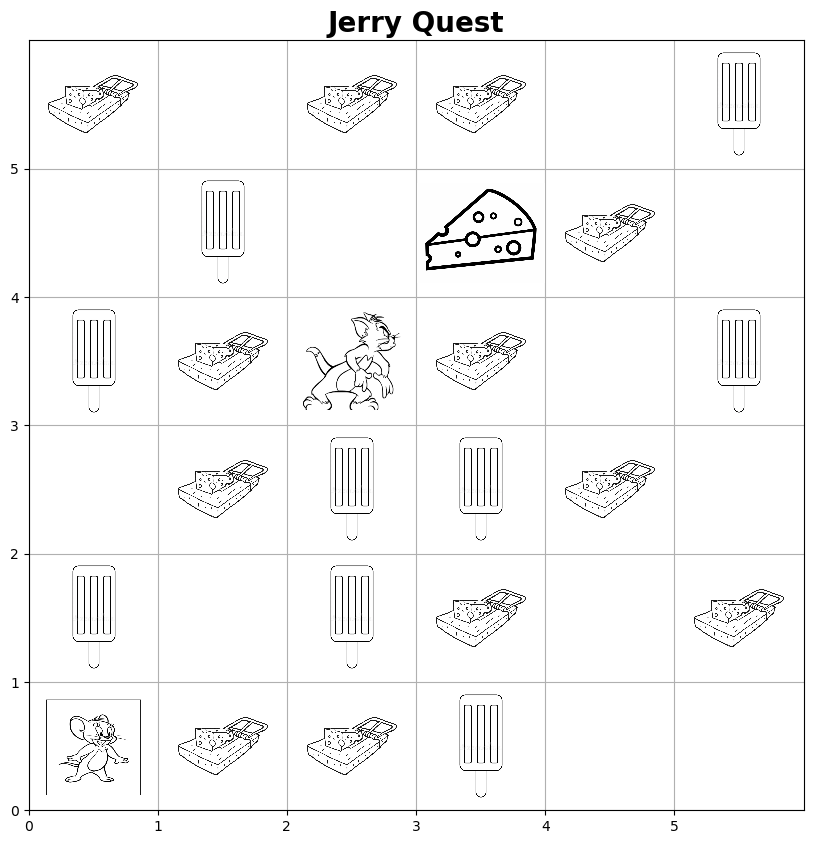

In [114]:
actdic = {0:"right", 2:"left", 1: "up", 3:"down"}
tomjerry = TomJerryEnvironment(def_env_type='deterministic',n=36,maximum_tsteps=50)
tomjerry.render(plot=True)


# Jerry positions for 11 actions

Jerry Current Position 6, Action taken: right, Reward achieved : -1, GoalReached: False, truncated: True


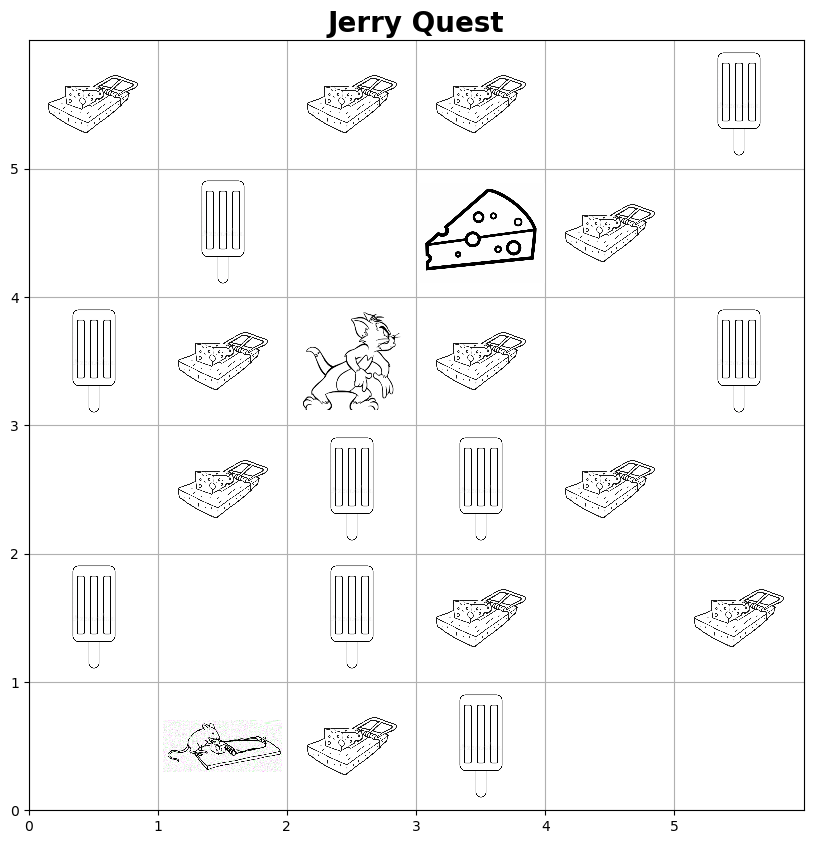

Jerry Current Position 7, Action taken: up, Reward achieved : 0, GoalReached: False, truncated: True


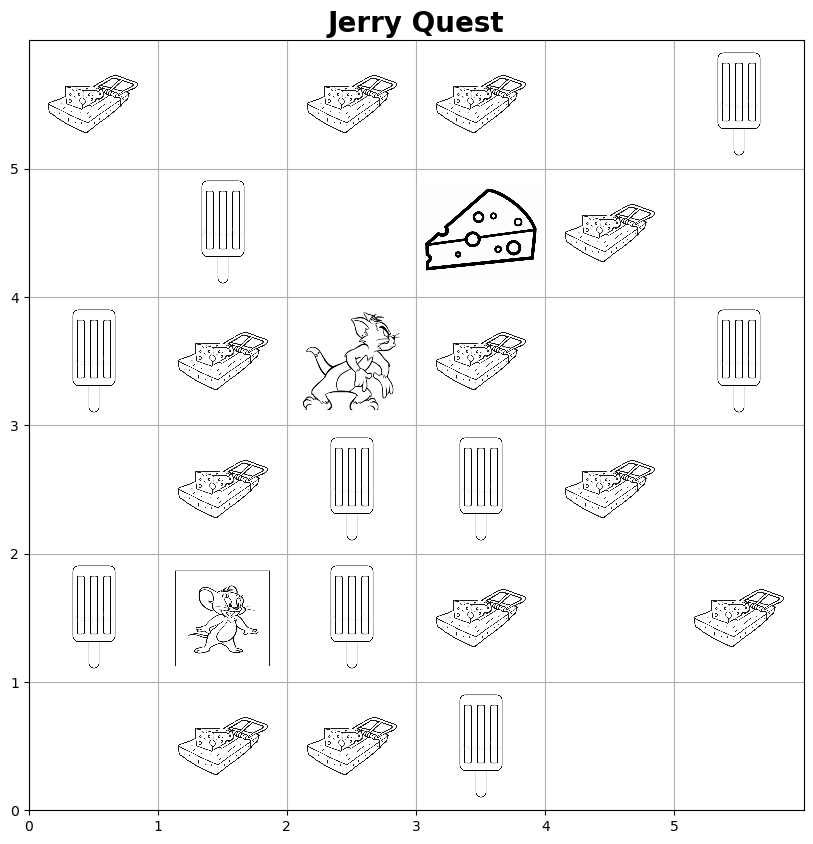

Jerry Current Position 13, Action taken: right, Reward achieved : 3, GoalReached: False, truncated: True


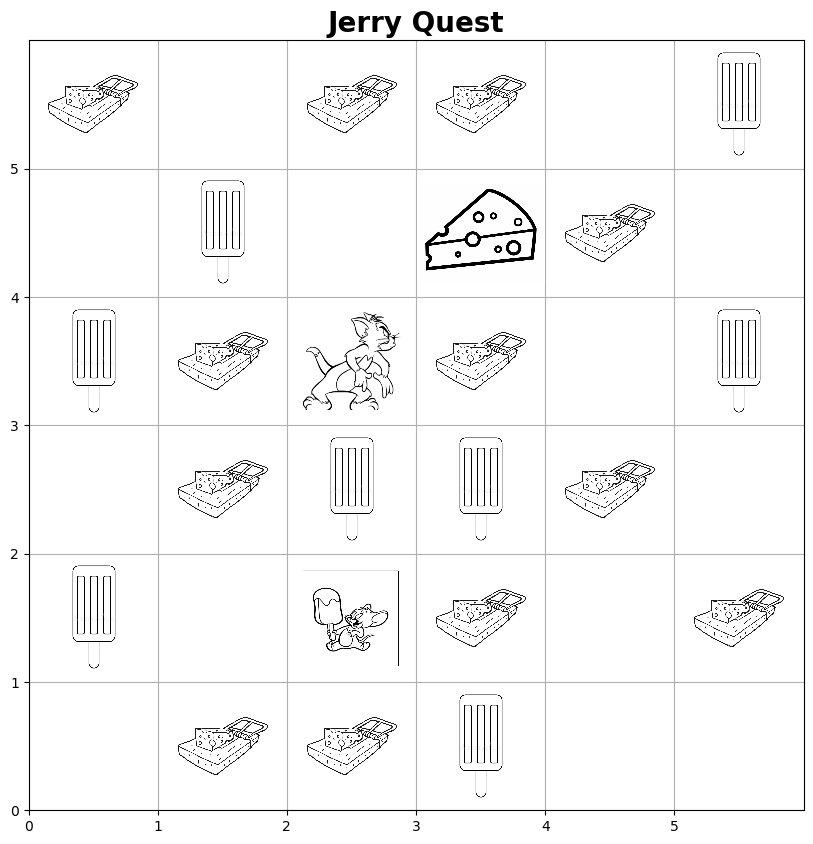

Jerry Current Position 19, Action taken: right, Reward achieved : -1, GoalReached: False, truncated: True


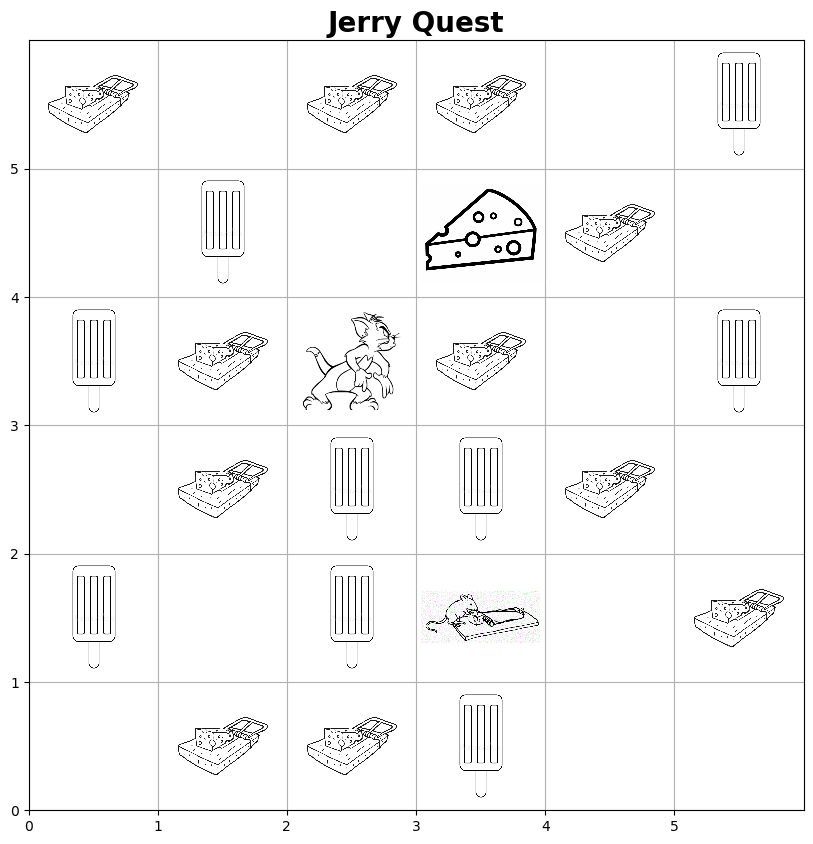

Jerry Current Position 20, Action taken: up, Reward achieved : 3, GoalReached: False, truncated: True


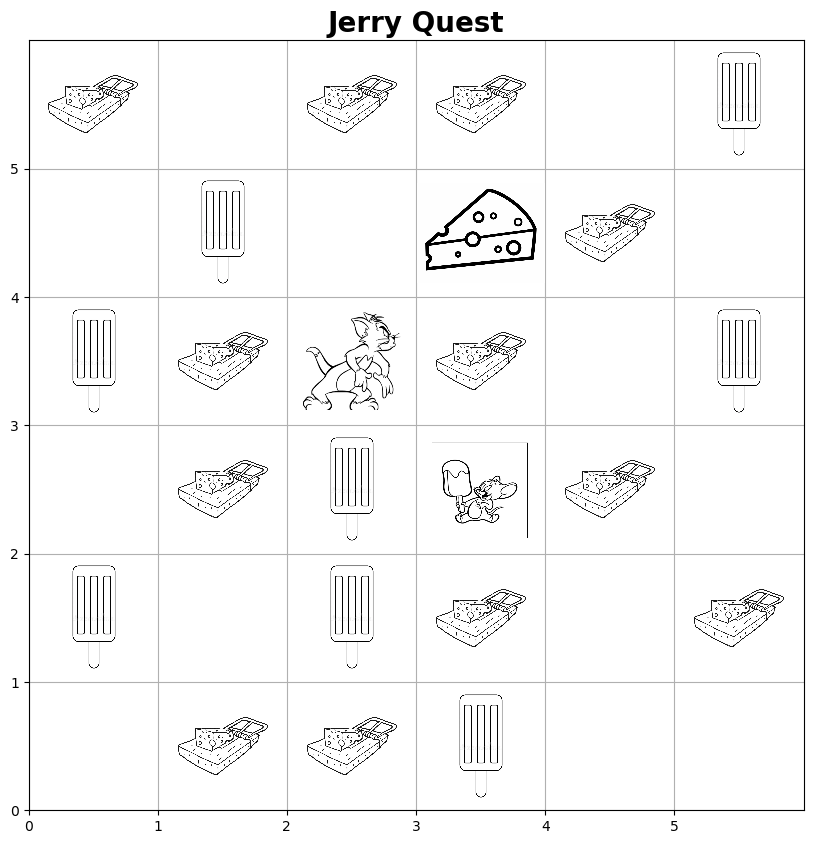

Jerry Current Position 14, Action taken: left, Reward achieved : 3, GoalReached: False, truncated: True


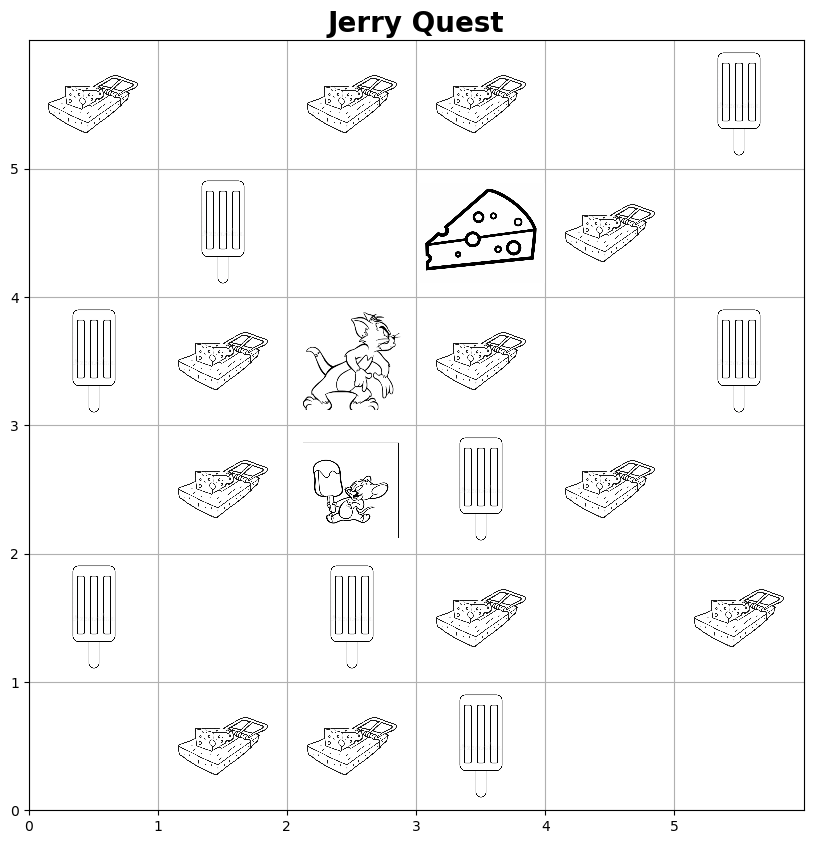

Jerry Current Position 15, Action taken: up, Reward achieved : -5, GoalReached: False, truncated: True
Jerry Killed and game starts again


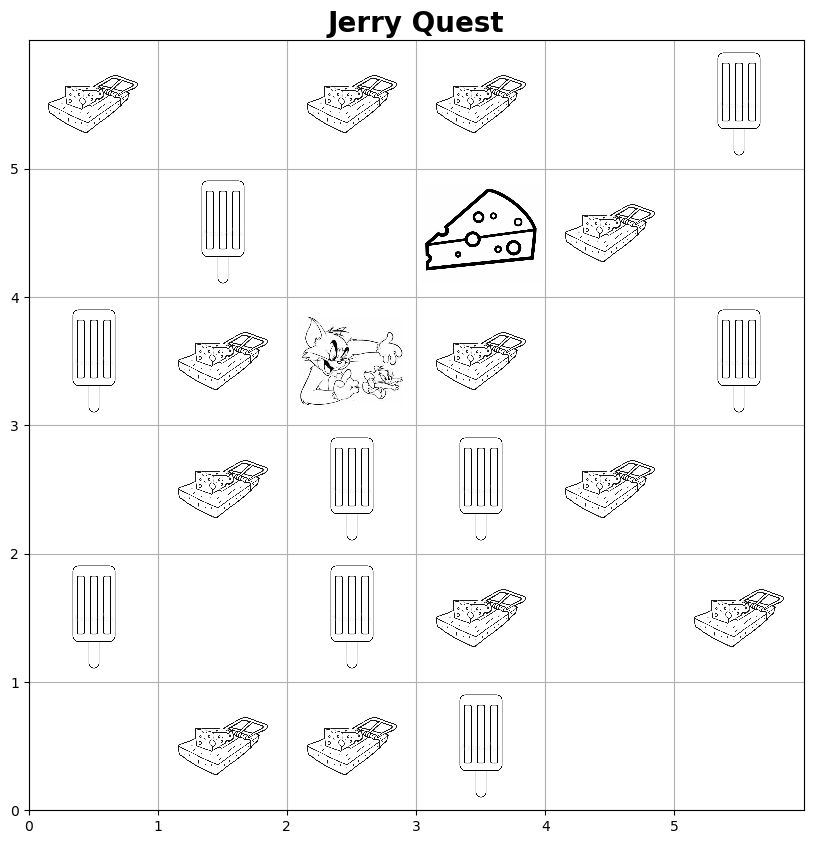

Jerry Current Position 1, Action taken: up, Reward achieved : 3, GoalReached: False, truncated: True


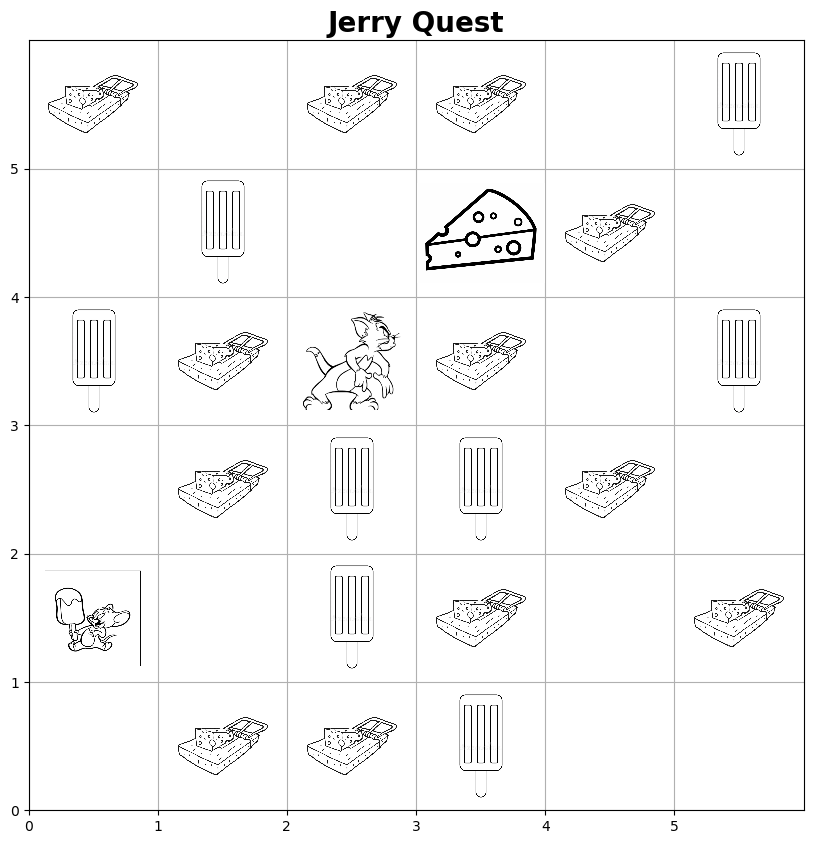

Jerry Current Position 0, Action taken: down, Reward achieved : 0, GoalReached: False, truncated: True


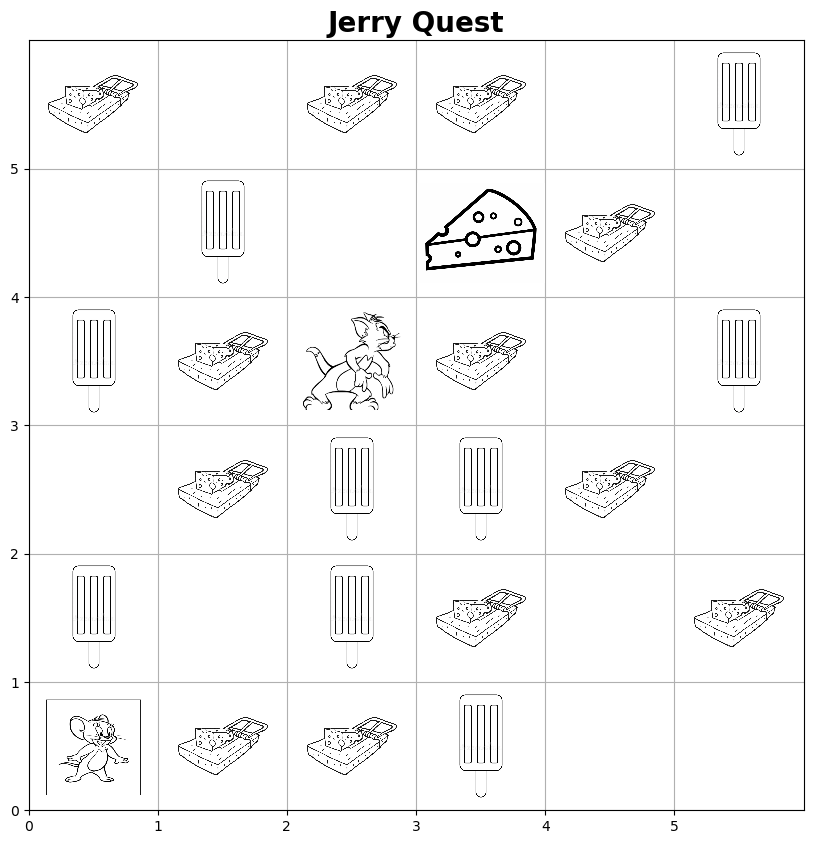

In [86]:
completed = False
tomjerry = TomJerryEnvironment(def_env_type='deterministic',n=36,maximum_tsteps=11)
tomjerry.reset()
actlist = [0,1,0,0,1,2,1,1,3]  

for action in actlist:
    state, reaching_goal, points, tomjerry.completed, truncated = tomjerry.step(action)
    print(f"Jerry Current Position {state}, Action taken: {actdic[action]}, Reward achieved : {points}, GoalReached: {reaching_goal}, truncated: {truncated}")
    if truncated:
        tomjerry.render(plot=True)


# Part 2

# SARSA implementation

initial [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


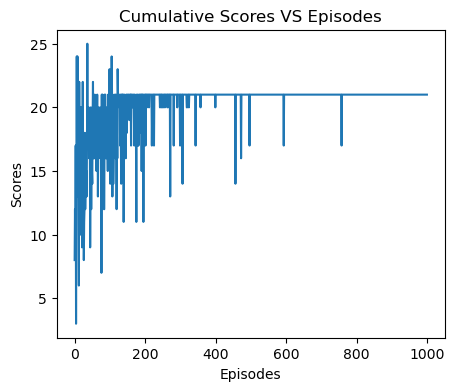

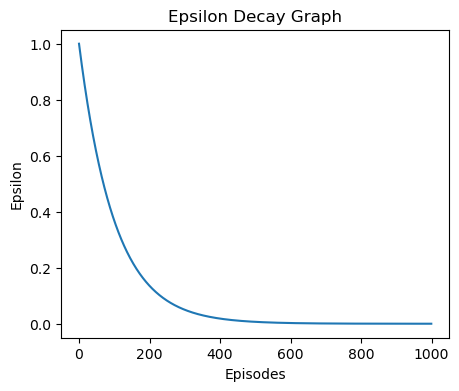

Q-Table:
[[ 7.47301388e-01  9.97856000e+00  4.14556271e+00  3.77404500e+00]
 [ 8.72320000e+00  1.81034966e+00  2.86039484e+00  4.23388666e+00]
 [ 1.33294682e-01  1.17386716e+00  4.27776990e-01  4.20334867e+00]
 [ 3.65611191e-02  3.93306585e-01  2.24906173e-01  9.80485805e-01]
 [ 2.09795594e+00 -3.05107355e-01  1.52428414e-01  4.21874288e-01]
 [-3.25253399e-02  3.10300128e-02  3.18426111e-02  1.76504231e-01]
 [-3.51472491e-02  4.81718463e+00  1.66755390e+00  3.58199668e-01]
 [ 1.09040000e+01  2.38150241e+00  2.93027364e+00  8.43747422e-01]
 [ 7.10988383e+00 -1.76867276e-01  5.56535623e-01  1.06123556e+00]
 [-1.89248122e+00  3.17761021e+00  2.78213513e-01  2.48300407e-01]
 [ 5.07136067e+00 -3.95243376e-02  1.49236849e-01  2.79987368e-01]
 [-1.52436080e-01 -4.18481030e-03 -2.69595948e-01  2.88473962e-01]
 [ 1.22125655e+00  5.13600023e+00  2.24775485e-01  2.81543330e-01]
 [ 1.82011456e+00  9.88000000e+00  4.03433915e+00  1.49269463e+00]
 [ 8.60000000e+00 -1.93157988e+00  2.57816962e+00  3.

In [3]:
class SarsaAgentImplementation:
    def __init__(self, tomjerry, decay=0.01, lr=0.1, gamma=0.99, ini_epi=1, fin_epi=0,
                 is_greedy=False, episodesTotal=700):
        self.tomjerry = tomjerry
        self.decay = decay
        self.lr = lr
        self.gamma = gamma
        self.ini_epi = ini_epi
        self.fin_epi = fin_epi
        self.is_greedy = is_greedy
        self.episodesTotal = episodesTotal
        self.qTable = np.zeros((tomjerry.observe.n, tomjerry.number_actions.n))
        self.spoints = []

    def sarsa_algo(self):
        epiList = []
        cumScore = []
        
        c = []
        episode = 0
        
        while episode < self.episodesTotal:
            self.tomjerry.reset()
            action_list = []
            
            state = 0
            reaching_goal = False
            score = 0
            cat = []
            p = []
            cat.append(tomjerry.position_of_jerry)
            epi = self.fin_epi + (self.ini_epi - self.fin_epi) * np.exp(-self.decay * episode)

            act = np.argmax(self.qTable[state]) if self.is_greedy or np.any(np.random.uniform(0, 1) > epi) else self.tomjerry.number_actions.sample()
            action_list.append(act)
            for steps in range(self.tomjerry.maximum_steps + 1):
                state_, goal, points, completed, truncated = self.tomjerry.step(act)
                #print(points)
                score += points
                p.append(points)

                act_ = np.argmax(self.qTable[state_]) if self.is_greedy or np.any(np.random.uniform(0, 1) > epi) else self.tomjerry.number_actions.sample()

                self.qTable[state, act] = self.qTable[state, act] + self.lr * (
                        points + self.gamma * self.qTable[state_, act_] - self.qTable[state, act])

                act = act_
                state = state_
                action_list.append(act)
                cat.append(tomjerry.position_of_jerry)

                if goal:
                    reaching_goal = True
                    break
            #print('action list is', action_list)
            #print(cat)
            #print(p)

            epiList.append(epi)
            cumScore.append(score)
            #print('The overall score is', score)
            episode += 1
            
        for i in c:
            print(i)
        if not self.is_greedy:
            self.spoints = cumScore
        

        self.plot_cumScore(cumScore)
        self.plot_epiDecay(epiList)
        self.qtable()

    def plot_cumScore(self, scores):
        plt.figure(figsize=(5, 4))
        plt.plot(scores)
        plt.title('Cumulative Scores VS Episodes')
        plt.xlabel('Episodes')
        plt.ylabel('Scores')
        plt.show()

    def plot_epiDecay(self, epiList):
        plt.figure(figsize=(5, 4))
        plt.plot(epiList)
        plt.title('Epsilon Decay Graph')
        plt.xlabel('Episodes')
        plt.ylabel('Epsilon')
        plt.show()

    def qtable(self):
        print("Q-Table:")
        print(self.qTable)


# Assuming TomJerryEnvironment is defined somewhere
tomjerry = TomJerryEnvironment(def_env_type='deterministic', n=36, maximum_tsteps=100)
qTable = np.zeros((tomjerry.observe.n, tomjerry.number_actions.n))
iniQ = qTable.copy()
print(f'initial {iniQ}')

tomjerry_sarsa = SarsaAgentImplementation(tomjerry, decay=0.01, lr=0.1, gamma=0.80, ini_epi=1, fin_epi=0,
                                       is_greedy=False, episodesTotal=1000)
tomjerry_sarsa.sarsa_algo()
actdic = {0:"right", 2:"left", 1: "up", 3:"down"}


# Greedy action

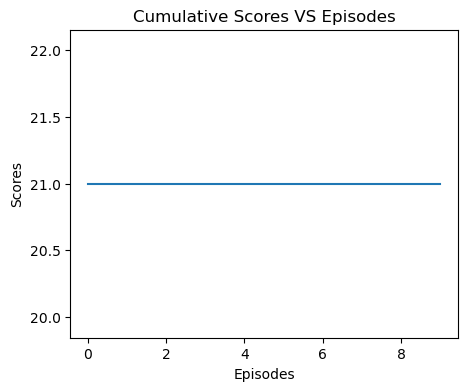

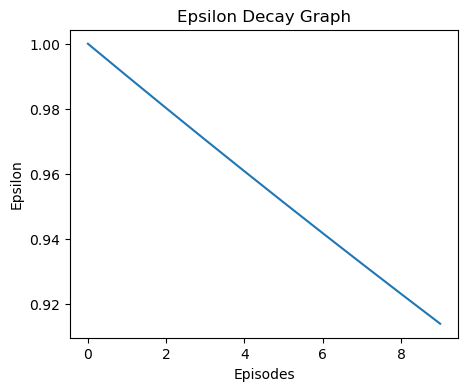

Q-Table:
[[ 7.47301388e-01  9.97856000e+00  4.14556271e+00  3.77404500e+00]
 [ 8.72320000e+00  1.81034966e+00  2.86039484e+00  4.23388666e+00]
 [ 1.33294682e-01  1.17386716e+00  4.27776990e-01  4.20334867e+00]
 [ 3.65611191e-02  3.93306585e-01  2.24906173e-01  9.80485805e-01]
 [ 2.09795594e+00 -3.05107355e-01  1.52428414e-01  4.21874288e-01]
 [-3.25253399e-02  3.10300128e-02  3.18426111e-02  1.76504231e-01]
 [-3.51472491e-02  4.81718463e+00  1.66755390e+00  3.58199668e-01]
 [ 1.09040000e+01  2.38150241e+00  2.93027364e+00  8.43747422e-01]
 [ 7.10988383e+00 -1.76867276e-01  5.56535623e-01  1.06123556e+00]
 [-1.89248122e+00  3.17761021e+00  2.78213513e-01  2.48300407e-01]
 [ 5.07136067e+00 -3.95243376e-02  1.49236849e-01  2.79987368e-01]
 [-1.52436080e-01 -4.18481030e-03 -2.69595948e-01  2.88473962e-01]
 [ 1.22125655e+00  5.13600023e+00  2.24775485e-01  2.81543330e-01]
 [ 1.82011456e+00  9.88000000e+00  4.03433915e+00  1.49269463e+00]
 [ 8.60000000e+00 -1.93157988e+00  2.57816962e+00  3.

In [4]:
tomjerry_sarsa.is_greedy = True
tomjerry_sarsa.episodesTotal = 10
tomjerry_sarsa.sarsa_algo()


# Hyper parameter tuning using Gamma values = [0.45,0.65,0.85]

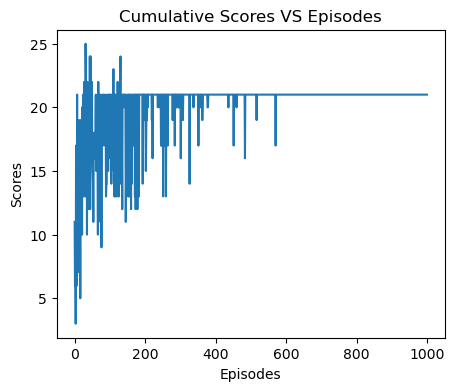

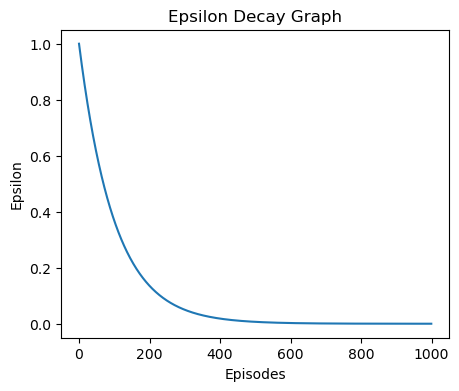

Q-Table:
[[-4.26257046e-01  4.06847859e+00  1.18837732e+00  1.28817732e+00]
 [ 2.37439687e+00  8.67546631e-01  7.69732893e-01  1.10130917e+00]
 [ 4.54360643e-01  2.94876262e+00  5.37572761e-01  7.71059989e-01]
 [ 3.72208702e-01  1.24731390e+00  1.86699730e-01  4.75697517e-01]
 [ 3.87543774e+00 -5.22981563e-01  2.86373791e-01  3.28972529e-01]
 [ 9.45539268e-04  3.62648280e-02  2.19290717e-02  4.67015711e-01]
 [-1.13387346e-01  7.29803502e-01  1.50840171e+00  3.97327130e-01]
 [ 5.27643750e+00  1.33977321e-02  8.02796288e-01 -4.63867230e-01]
 [ 3.28216044e+00 -4.49429914e-02  6.02924477e-01  1.14806741e+00]
 [-1.42425344e+00  3.35656815e+00  1.46852099e+00  6.26709820e-01]
 [ 3.80042176e+00  7.79498762e-02  5.22645662e-01  1.44939347e-01]
 [-2.86163263e-01  1.41124445e-02 -1.73315041e-01  6.03230276e-01]
 [ 2.29359656e+00  1.45809776e+00  2.14626338e-01  5.55590826e-01]
 [ 2.24202517e-01  5.05875000e+00  1.78728510e+00 -9.63942682e-02]
 [ 4.57500000e+00 -3.83745485e+00  2.31179020e-01  1.

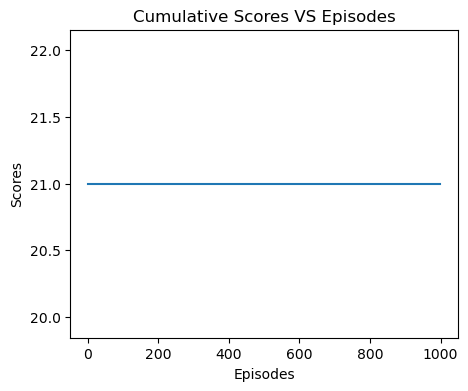

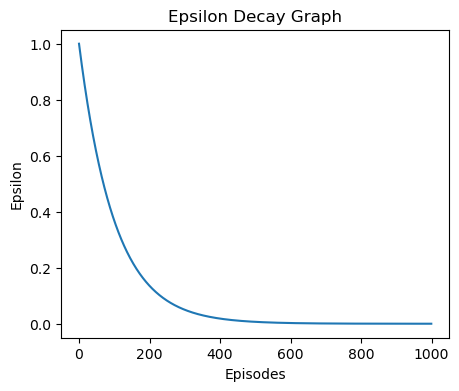

Q-Table:
[[-4.26257046e-01  4.06847859e+00  1.18837732e+00  1.28817732e+00]
 [ 2.37439687e+00  8.67546631e-01  7.69732893e-01  1.10130917e+00]
 [ 4.54360643e-01  2.94876262e+00  5.37572761e-01  7.71059989e-01]
 [ 3.72208702e-01  1.24731390e+00  1.86699730e-01  4.75697517e-01]
 [ 3.87543774e+00 -5.22981563e-01  2.86373791e-01  3.28972529e-01]
 [ 9.45539268e-04  3.62648280e-02  2.19290717e-02  4.67015711e-01]
 [-1.13387346e-01  7.29803502e-01  1.50840171e+00  3.97327130e-01]
 [ 5.27643750e+00  1.33977321e-02  8.02796288e-01 -4.63867230e-01]
 [ 3.28216044e+00 -4.49429914e-02  6.02924477e-01  1.14806741e+00]
 [-1.42425344e+00  3.35656815e+00  1.46852099e+00  6.26709820e-01]
 [ 3.80042176e+00  7.79498762e-02  5.22645662e-01  1.44939347e-01]
 [-2.86163263e-01  1.41124445e-02 -1.73315041e-01  6.03230276e-01]
 [ 2.29359656e+00  1.45809776e+00  2.14626338e-01  5.55590826e-01]
 [ 2.24202517e-01  5.05875000e+00  1.78728510e+00 -9.63942682e-02]
 [ 4.57500000e+00 -3.83745485e+00  2.31179020e-01  1.

In [89]:
tomjerry_sarsa.gamma = 0.45
tomjerry_sarsa.is_greedy = False
tomjerry_sarsa.sarsa_algo()


tomjerry_sarsa.is_greedy=  True
tomjerry_sarsa.sarsa_algo()

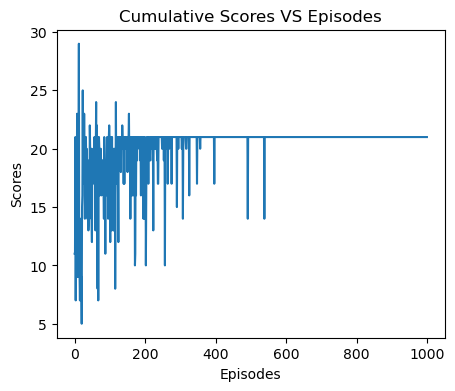

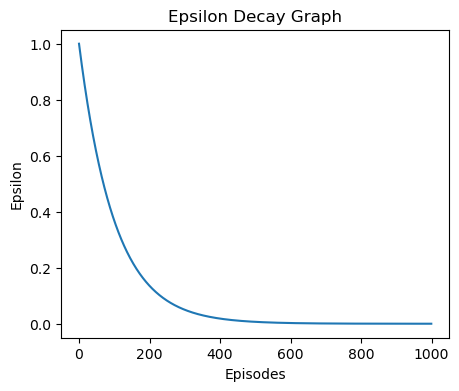

Q-Table:
[[ 8.32751130e-02  6.26505359e+00  1.98886918e+00  2.34899516e+00]
 [ 5.02315937e+00  1.40970451e+00  2.02513169e+00  2.33176733e+00]
 [ 4.63628846e-01  3.02280172e+00  9.22786176e-01  9.63720262e-01]
 [-2.50647130e-01  1.70714300e+00  3.63456938e-01  1.07288202e+00]
 [ 4.32002210e+00 -4.16246409e-01  1.10756939e+00  6.41127155e-01]
 [ 4.95454130e-02  5.04188142e-02  1.41866487e-01  5.98018524e-01]
 [ 1.78016904e-01  1.38804599e+00  2.66452497e+00  7.17193913e-01]
 [ 7.72793750e+00  5.89770700e-01  1.42144637e+00 -8.12798367e-02]
 [ 4.27289066e+00  8.82897444e-02  1.06486730e+00  1.26803434e+00]
 [-2.07778212e+00  2.98635228e+00  1.11068088e+00  4.53022494e-01]
 [ 4.68270848e+00  5.18831636e-02  6.70856816e-01  4.10124656e-01]
 [ 1.13845662e-01  1.38950947e-01 -2.26296856e-01  8.56689125e-01]
 [ 1.49720398e+00  3.00199271e+00  1.34535472e-01  7.43070598e-01]
 [ 1.10976825e+00  7.27375000e+00  3.24461602e+00  6.47400799e-01]
 [ 6.57500000e+00 -2.18057059e+00  9.94145208e-01  3.

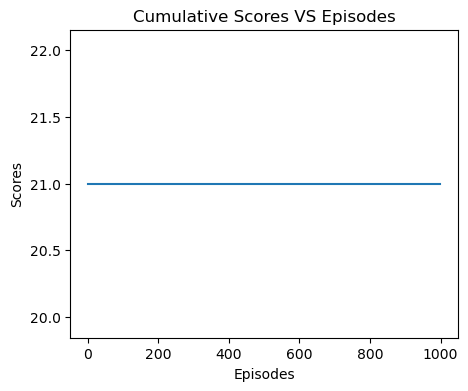

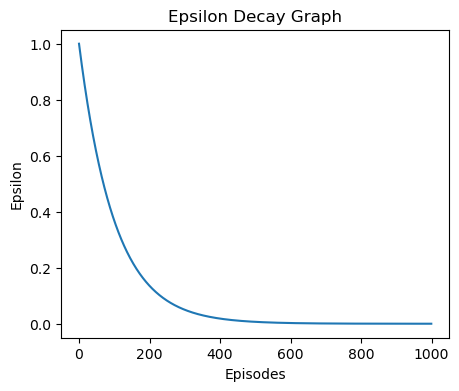

Q-Table:
[[ 8.32751130e-02  6.26505359e+00  1.98886918e+00  2.34899516e+00]
 [ 5.02315937e+00  1.40970451e+00  2.02513169e+00  2.33176733e+00]
 [ 4.63628846e-01  3.02280172e+00  9.22786176e-01  9.63720262e-01]
 [-2.50647130e-01  1.70714300e+00  3.63456938e-01  1.07288202e+00]
 [ 4.32002210e+00 -4.16246409e-01  1.10756939e+00  6.41127155e-01]
 [ 4.95454130e-02  5.04188142e-02  1.41866487e-01  5.98018524e-01]
 [ 1.78016904e-01  1.38804599e+00  2.66452497e+00  7.17193913e-01]
 [ 7.72793750e+00  5.89770700e-01  1.42144637e+00 -8.12798367e-02]
 [ 4.27289066e+00  8.82897444e-02  1.06486730e+00  1.26803434e+00]
 [-2.07778212e+00  2.98635228e+00  1.11068088e+00  4.53022494e-01]
 [ 4.68270848e+00  5.18831636e-02  6.70856816e-01  4.10124656e-01]
 [ 1.13845662e-01  1.38950947e-01 -2.26296856e-01  8.56689125e-01]
 [ 1.49720398e+00  3.00199271e+00  1.34535472e-01  7.43070598e-01]
 [ 1.10976825e+00  7.27375000e+00  3.24461602e+00  6.47400799e-01]
 [ 6.57500000e+00 -2.18057059e+00  9.94145208e-01  3.

In [90]:
tomjerry_sarsa.gamma = 0.65
tomjerry_sarsa.is_greedy = False
tomjerry_sarsa.sarsa_algo()


tomjerry_sarsa.is_greedy=  True
tomjerry_sarsa.sarsa_algo()

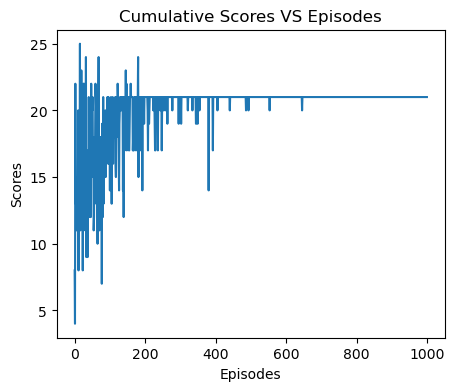

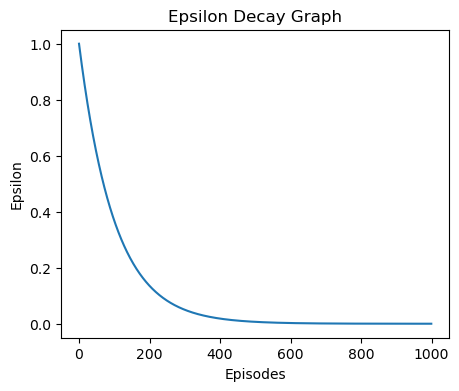

Q-Table:
[[ 2.41181828e+00  1.19036836e+01  5.84090365e+00  4.60262564e+00]
 [ 1.04749219e+01  3.50420705e+00  4.03891170e+00  4.28114315e+00]
 [ 1.40847189e+00  5.51312312e+00  2.13375470e+00  1.90531009e+00]
 [ 1.02591390e+00  4.44433372e+00  1.35526401e+00  1.92392454e+00]
 [ 7.74495424e+00 -1.59206415e-02  1.74717577e+00  1.86723553e+00]
 [ 2.88469117e-01  2.58961565e-01  4.65332849e-01  2.59193747e+00]
 [ 8.90436188e-01  3.50420036e+00  6.97584173e+00  1.37243757e+00]
 [ 1.23234375e+01  3.56397396e+00  4.97538126e+00  1.78836162e+00]
 [ 7.95935000e+00  4.92778069e-01  2.38837468e+00  2.75260800e+00]
 [-4.76963123e-02  3.72192454e+00  1.95498736e+00  1.50835087e+00]
 [ 7.04627713e+00  5.42133075e-01  2.44943912e+00  1.52798724e+00]
 [ 1.05451142e+00  4.02525343e-01 -7.04605944e-02  2.56218073e+00]
 [ 4.60768077e+00  2.95144353e+00  8.25229797e-01  1.90282194e+00]
 [ 2.74274326e+00  1.09687500e+01  5.84244006e+00  1.96940720e+00]
 [ 9.37500000e+00 -1.33256558e+00  3.15126878e+00  5.

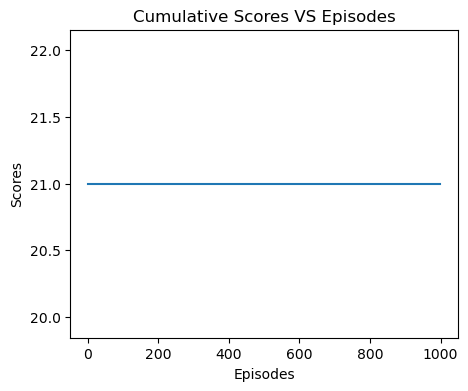

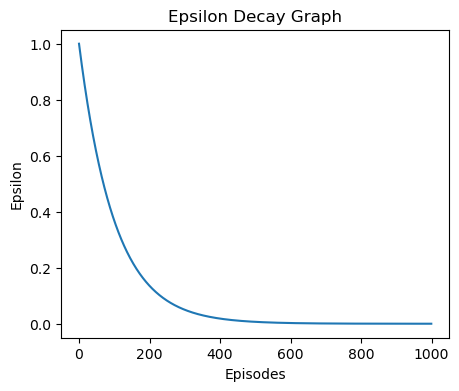

Q-Table:
[[ 2.41181828e+00  1.19036836e+01  5.84090365e+00  4.60262564e+00]
 [ 1.04749219e+01  3.50420705e+00  4.03891170e+00  4.28114315e+00]
 [ 1.40847189e+00  5.51312312e+00  2.13375470e+00  1.90531009e+00]
 [ 1.02591390e+00  4.44433372e+00  1.35526401e+00  1.92392454e+00]
 [ 7.74495424e+00 -1.59206415e-02  1.74717577e+00  1.86723553e+00]
 [ 2.88469117e-01  2.58961565e-01  4.65332849e-01  2.59193747e+00]
 [ 8.90436188e-01  3.50420036e+00  6.97584173e+00  1.37243757e+00]
 [ 1.23234375e+01  3.56397396e+00  4.97538126e+00  1.78836162e+00]
 [ 7.95935000e+00  4.92778069e-01  2.38837468e+00  2.75260800e+00]
 [-4.76963123e-02  3.72192454e+00  1.95498736e+00  1.50835087e+00]
 [ 7.04627713e+00  5.42133075e-01  2.44943912e+00  1.52798724e+00]
 [ 1.05451142e+00  4.02525343e-01 -7.04605944e-02  2.56218073e+00]
 [ 4.60768077e+00  2.95144353e+00  8.25229797e-01  1.90282194e+00]
 [ 2.74274326e+00  1.09687500e+01  5.84244006e+00  1.96940720e+00]
 [ 9.37500000e+00 -1.33256558e+00  3.15126878e+00  5.

In [91]:
tomjerry_sarsa.gamma = 0.85
tomjerry_sarsa.is_greedy = False
tomjerry_sarsa.sarsa_algo()


tomjerry_sarsa.is_greedy=  True
tomjerry_sarsa.sarsa_algo()

# Hyper parameter tuning using Decay rate values -> [0.001,0.005,0.01] 

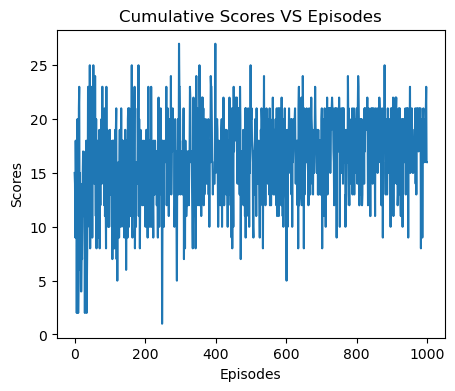

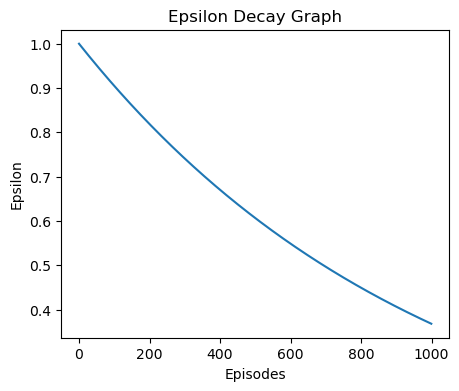

Q-Table:
[[ 3.16307258e+00  7.59832311e+00  5.20476935e+00  4.84406118e+00]
 [ 5.97311574e+00  4.32998791e+00  4.42160557e+00  4.96558580e+00]
 [ 3.49595029e+00  5.55919794e+00  3.72070608e+00  3.41501043e+00]
 [ 2.41853416e+00  4.31697558e+00  2.67700670e+00  3.22464230e+00]
 [ 6.42783520e+00  1.49034866e+00  3.40336869e+00  2.80616791e+00]
 [ 2.00012681e+00  1.95811856e+00  2.05625587e+00  3.63567755e+00]
 [ 2.59572573e+00  5.58828361e+00  4.68770264e+00  3.97388146e+00]
 [ 7.83141272e+00  3.72106833e+00  4.36218566e+00  3.53179198e+00]
 [ 6.00058923e+00  2.78404396e+00  3.20989199e+00  5.03514410e+00]
 [-3.00186091e-02  6.69763156e+00  3.87714160e+00  2.56438799e+00]
 [ 7.57483071e+00  2.70501734e+00  4.24176030e+00  2.61935344e+00]
 [ 2.60037978e+00  2.49363718e+00  1.15939282e+00  4.66369445e+00]
 [ 4.82067749e+00  5.14682939e+00  2.48541851e+00  3.32813037e+00]
 [ 3.06804406e+00  7.09873754e+00  5.50683224e+00  3.24540136e+00]
 [ 5.87182525e+00 -9.46385819e-03  3.94190271e+00  4.

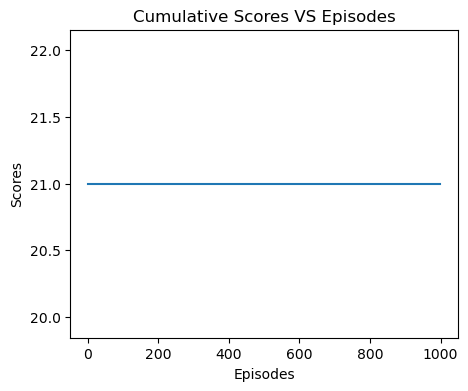

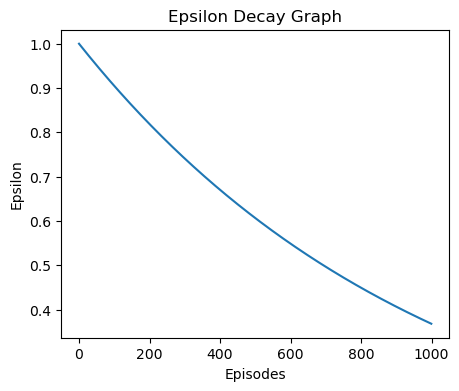

Q-Table:
[[ 3.16307258e+00  1.19036836e+01  5.20476935e+00  4.84406118e+00]
 [ 1.04749219e+01  4.32998791e+00  4.42160557e+00  4.96558580e+00]
 [ 3.49595029e+00  5.55919794e+00  3.72070608e+00  3.41501043e+00]
 [ 2.41853416e+00  4.31697558e+00  2.67700670e+00  3.22464230e+00]
 [ 6.42783520e+00  1.49034866e+00  3.40336869e+00  2.80616791e+00]
 [ 2.00012681e+00  1.95811856e+00  2.05625587e+00  3.63567755e+00]
 [ 2.59572573e+00  5.58828361e+00  4.68770264e+00  3.97388146e+00]
 [ 1.23234375e+01  3.72106833e+00  4.36218566e+00  3.53179198e+00]
 [ 6.00058923e+00  2.78404396e+00  3.20989199e+00  5.03514410e+00]
 [-3.00186091e-02  6.69763156e+00  3.87714160e+00  2.56438799e+00]
 [ 7.57483071e+00  2.70501734e+00  4.24176030e+00  2.61935344e+00]
 [ 2.60037978e+00  2.49363718e+00  1.15939282e+00  4.66369445e+00]
 [ 4.82067749e+00  5.14682939e+00  2.48541851e+00  3.32813037e+00]
 [ 3.06804406e+00  1.09687500e+01  5.50683224e+00  3.24540136e+00]
 [ 9.37500000e+00 -9.46385819e-03  3.94190271e+00  4.

In [92]:
tomjerry_sarsa.decay = 0.001
tomjerry_sarsa.is_greedy = False
tomjerry_sarsa.sarsa_algo()


tomjerry_sarsa.is_greedy=  True
tomjerry_sarsa.sarsa_algo()

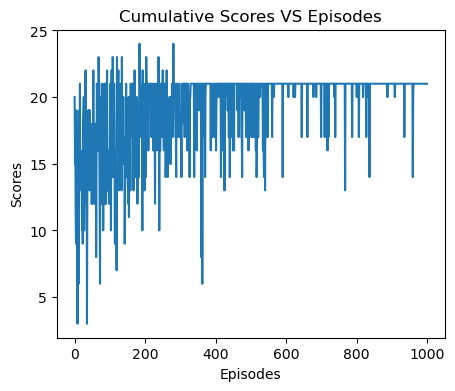

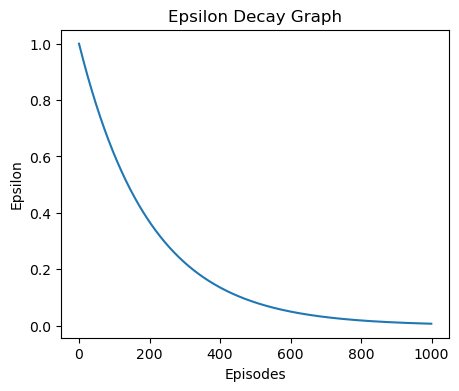

Q-Table:
[[ 4.39041436 11.35164775  7.20201544  6.95553703]
 [10.17618385  4.15015396  6.26400303  7.05854591]
 [ 2.72715549  3.64581046  3.01225075  6.41052616]
 [ 2.42126741  2.66479953  2.45917794  2.98125883]
 [ 4.53779082  1.53782778  2.97486314  2.63438867]
 [ 2.16497919  1.97037686  2.05398194  2.98884346]
 [ 2.75671871  8.99182423  3.52904297  2.9807859 ]
 [12.13557908  4.83184612  6.68959652  4.70398705]
 [ 8.91915008  1.99204247  3.2647624   4.51282188]
 [ 0.69045445  6.14038989  3.91564077  3.05420673]
 [ 6.71467251  2.48814632  3.07064559  2.43298672]
 [ 2.7193434   2.49633139  1.44588126  3.5142829 ]
 [ 4.04575936  7.7665492   3.04931432  3.26238438]
 [ 4.67231703 10.8976757   7.31750557  4.51104429]
 [ 9.37075577  1.28758454  5.03443427  7.01748072]
 [ 5.67677315  8.37913073  2.82720102  4.38625432]
 [10.          2.67218709  5.4850277   3.33069509]
 [ 3.64677749  3.08759952  2.12379575  5.25289085]
 [ 1.28134602  3.13805096  3.32488926  2.09899153]
 [ 1.55475074  7.51913

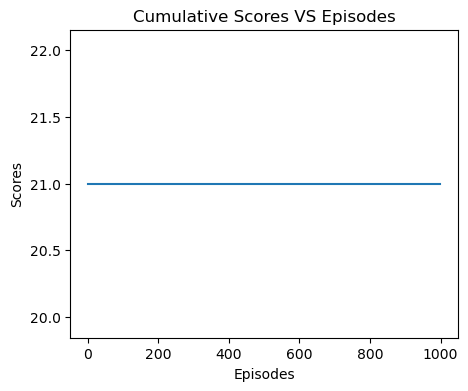

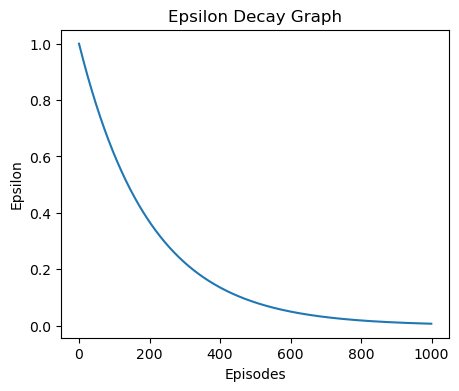

Q-Table:
[[ 4.39041436 11.90368359  7.20201544  6.95553703]
 [10.47492187  4.15015396  6.26400303  7.05854591]
 [ 2.72715549  3.64581046  3.01225075  6.41052616]
 [ 2.42126741  2.66479953  2.45917794  2.98125883]
 [ 4.53779082  1.53782778  2.97486314  2.63438867]
 [ 2.16497919  1.97037686  2.05398194  2.98884346]
 [ 2.75671871  8.99182423  3.52904297  2.9807859 ]
 [12.3234375   4.83184612  6.68959652  4.70398705]
 [ 8.91915008  1.99204247  3.2647624   4.51282188]
 [ 0.69045445  6.14038989  3.91564077  3.05420673]
 [ 6.71467251  2.48814632  3.07064559  2.43298672]
 [ 2.7193434   2.49633139  1.44588126  3.5142829 ]
 [ 4.04575936  7.7665492   3.04931432  3.26238438]
 [ 4.67231703 10.96875     7.31750557  4.51104429]
 [ 9.375       1.28758454  5.03443427  7.01748072]
 [ 5.67677315  8.37913073  2.82720102  4.38625432]
 [10.          2.67218709  5.4850277   3.33069509]
 [ 3.64677749  3.08759952  2.12379575  5.25289085]
 [ 1.28134602  3.13805096  3.32488926  2.09899153]
 [ 1.55475074  7.51913

In [93]:
tomjerry_sarsa.decay = 0.005
tomjerry_sarsa.is_greedy = False
tomjerry_sarsa.sarsa_algo()


tomjerry_sarsa.is_greedy=  True
tomjerry_sarsa.sarsa_algo()

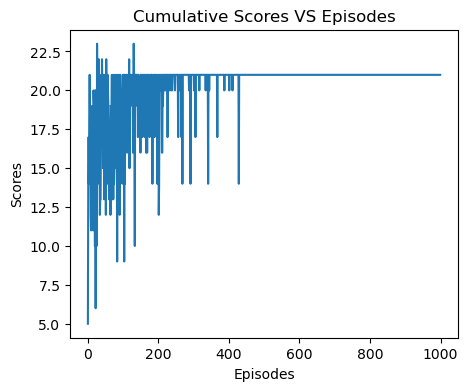

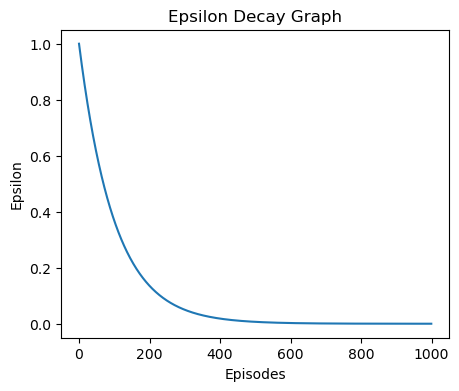

Q-Table:
[[ 3.10745808 11.90368359  5.59659881  6.84054996]
 [10.47492187  3.59288571  5.26015486  6.11348904]
 [ 3.56543566  3.95866976  3.51569789  5.14025446]
 [ 3.07678148  2.86888874  2.52124773  3.32939801]
 [ 4.93053438  1.46027861  2.37792155  2.91903553]
 [ 2.13356688  1.97037686  2.08572097  2.77202181]
 [ 3.05097391  3.81506983  6.56245821  3.69746235]
 [12.3234375   3.83100078  5.02949723  3.41508963]
 [ 7.89355435  2.69724959  3.48696076  4.38262935]
 [ 1.09383687  6.94889686  3.83733961  3.92001089]
 [ 6.55684871  2.59321754  2.7008766   2.50091862]
 [ 2.66429716  2.32075019  1.34578318  4.03896647]
 [ 4.55316929  7.20431357  3.01281788  3.81438913]
 [ 3.70019552 10.96875     6.00649058  3.586245  ]
 [ 9.375       0.87433278  3.9756752   6.59628466]
 [ 4.6514737   7.55186015  3.21554012  4.86389431]
 [10.          2.97947437  5.59604784  3.72399474]
 [ 4.38247631  3.05621435  2.10122662  5.4276298 ]
 [ 1.3949248   3.89728385  3.37227571  2.6803475 ]
 [ 1.92201273  6.67547

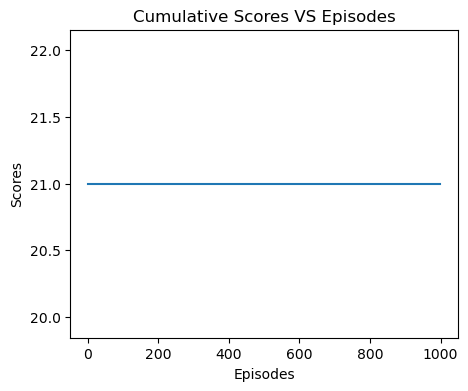

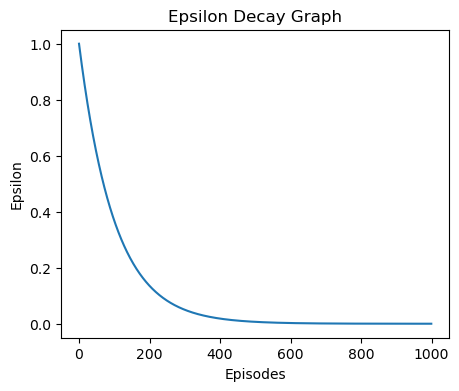

Q-Table:
[[ 3.10745808 11.90368359  5.59659881  6.84054996]
 [10.47492187  3.59288571  5.26015486  6.11348904]
 [ 3.56543566  3.95866976  3.51569789  5.14025446]
 [ 3.07678148  2.86888874  2.52124773  3.32939801]
 [ 4.93053438  1.46027861  2.37792155  2.91903553]
 [ 2.13356688  1.97037686  2.08572097  2.77202181]
 [ 3.05097391  3.81506983  6.56245821  3.69746235]
 [12.3234375   3.83100078  5.02949723  3.41508963]
 [ 7.89355435  2.69724959  3.48696076  4.38262935]
 [ 1.09383687  6.94889686  3.83733961  3.92001089]
 [ 6.55684871  2.59321754  2.7008766   2.50091862]
 [ 2.66429716  2.32075019  1.34578318  4.03896647]
 [ 4.55316929  7.20431357  3.01281788  3.81438913]
 [ 3.70019552 10.96875     6.00649058  3.586245  ]
 [ 9.375       0.87433278  3.9756752   6.59628466]
 [ 4.6514737   7.55186015  3.21554012  4.86389431]
 [10.          2.97947437  5.59604784  3.72399474]
 [ 4.38247631  3.05621435  2.10122662  5.4276298 ]
 [ 1.3949248   3.89728385  3.37227571  2.6803475 ]
 [ 1.92201273  6.67547

In [94]:
tomjerry_sarsa.decay = 0.01
tomjerry_sarsa.is_greedy = False
tomjerry_sarsa.sarsa_algo()


tomjerry_sarsa.is_greedy=  True
tomjerry_sarsa.sarsa_algo()

# Part 3 

# Double Q-Learning

initial [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


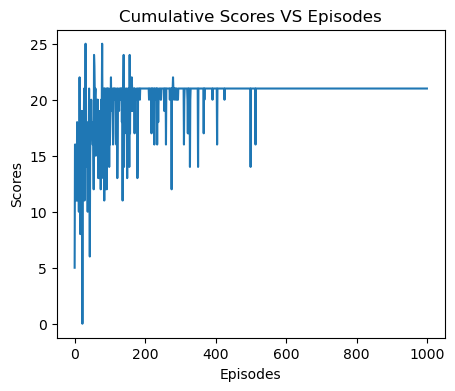

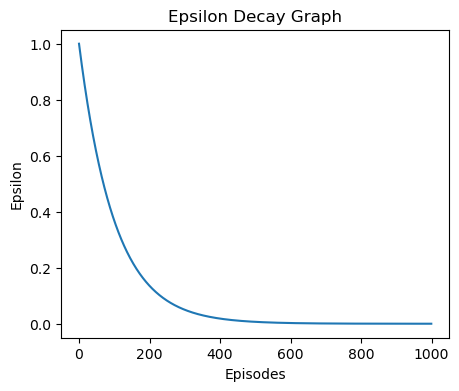

Q1-Table:
[[ 1.85405628e+00  2.01967965e+01  8.38863655e+00  8.02205004e+00]
 [ 1.73705019e+01  1.44108721e+00  7.44448450e+00  6.99482763e+00]
 [ 6.20490500e-01  1.45790103e+00  1.35255976e+00  4.45793975e+00]
 [ 1.90844224e+00  1.47374049e+00  1.66037809e-01  1.72889005e+00]
 [ 2.17153897e+00 -2.49455190e-01  2.96711264e-01  1.85486245e-01]
 [ 8.53476181e-02 -6.43043610e-04  6.22973091e-03  8.51689764e-01]
 [ 6.04164496e-01  1.16777340e+00  1.11436662e+01  4.17879308e-01]
 [ 1.75459611e+01  1.88096182e+00  4.50807665e+00  2.90174829e+00]
 [ 1.10373186e+01  1.17393796e+00  9.39215104e-01  1.22103039e+00]
 [-1.64055606e+00  2.86194094e+00  1.03288790e+00  2.39239719e-01]
 [ 6.00412278e+00  2.59081577e-01  2.28912024e-01  1.76842114e+00]
 [-2.40977990e-01  1.00373701e-01 -5.37735113e-02  5.90301955e-01]
 [ 1.56515514e+00  5.99662763e+00  3.33779104e-01  9.54658547e-01]
 [ 1.16728834e+00  1.46928900e+01  4.93588060e+00  1.94643019e+00]
 [ 1.18110000e+01  1.24216395e-01  2.15717991e+00  7

In [102]:
class DoubleQAgentImplementation:
    def __init__(self, tomjerry, decay=0.01, lr=0.1, gamma=0.99, ini_epi=1, fin_epi=0,
                 is_greedy=False, episodesTotal=700):
        self.tomjerry = tomjerry
        self.decay = decay
        self.lr = lr
        self.gamma = gamma
        self.ini_epi = ini_epi
        self.fin_epi = fin_epi
        self.is_greedy = is_greedy
        self.episodesTotal = episodesTotal
        self.q1Table = np.zeros((tomjerry.observe.n, tomjerry.number_actions.n))
        self.q2Table = np.zeros((tomjerry.observe.n, tomjerry.number_actions.n))
        self.DQpoints = []

    def DQ_learning_algo(self):
        epiList = []
        cumScore = []

        for episode in range(self.episodesTotal):
            self.tomjerry.reset()
            state = 0
            reaching_goal = False
            score = 0
            epi = self.fin_epi + (self.ini_epi - self.fin_epi) * np.exp(-self.decay * episode)

            act = np.argmax(self.q1Table[state] + self.q2Table[state]) if self.is_greedy or np.random.uniform(0, 1) > epi else self.tomjerry.number_actions.sample()

            steps = 0
            while not reaching_goal and steps <= self.tomjerry.maximum_steps:
                steps += 1
                state_, reaching_goal, points, completed, truncated = self.tomjerry.step(act)
                score += points

                act_ = np.argmax(self.q1Table[state_] + self.q2Table[state_]) if self.is_greedy or np.random.uniform(0, 1) > epi else self.tomjerry.number_actions.sample()
                if np.random.random() < 0.5:
                    self.q1Table[state, act] = self.q1Table[state, act] + self.lr * (
                        points + self.gamma * self.q2Table[state_, np.argmax(self.q1Table[state_])] -
                        self.q1Table[state, act]) 
                else:
                    self.q2Table[state, act] = self.q2Table[state, act] + self.lr * (
                        points + self.gamma * self.q1Table[state_, np.argmax(self.q2Table[state_])] -
                        self.q2Table[state, act]) 

                act = act_
                state = state_

            epiList.append(epi)
            cumScore.append(score)
        if not self.is_greedy:
            self.DQpoints= cumScore

        self.plot_cumScores(cumScore)
        self.plot_epiDecay(epiList)
        self.qtables()

    def plot_cumScores(self, scores):
        plt.figure(figsize=(5, 4))
        plt.plot(scores)
        plt.title('Cumulative Scores VS Episodes')
        plt.xlabel('Episodes')
        plt.ylabel('Scores')
        plt.show()

    def plot_epiDecay(self, epiList):
        plt.figure(figsize=(5, 4))
        plt.plot(epiList)
        plt.title('Epsilon Decay Graph')
        plt.xlabel('Episodes')
        plt.ylabel('Epsilon')
        plt.show()

    def qtables(self):
        print("Q1-Table:")
        print(self.q1Table)
        print("\nQ2-Table:")
        print(self.q2Table)


# Assume TomJerryEnvironment is defined somewhere
tomjerry = TomJerryEnvironment(def_env_type='deterministic', n=36, maximum_tsteps=100)
qTable = np.zeros((tomjerry.observe.n, tomjerry.number_actions.n))
iniQ = qTable.copy()
print(f'initial {iniQ}')
tomjerry_DQ = DoubleQAgentImplementation(tomjerry, decay=0.01, lr=0.1, gamma=0.99, ini_epi=1, fin_epi=0,
                              is_greedy=False, episodesTotal=1000)
tomjerry_DQ.DQ_learning_algo()


# Greedy actions

In [ ]:
tomjerry_DQ.is_greedy = True
tomjerry_DQ.episodesTotal=10
tomjerry_DQ.DQ_learning_algo()

# Hyper parameter tuning using Gamma values = [0.45,0.65,0.85]

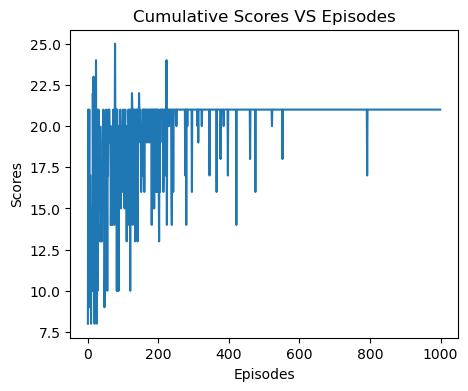

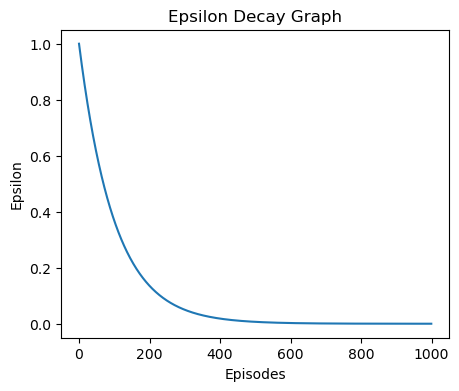

Q1-Table:
[[ 7.73625886e-01  4.06847859e+00  2.13496345e+00  1.88376381e+00]
 [ 2.37439687e+00  1.16413344e+00  1.34202595e+00  1.57723375e+00]
 [ 1.17150163e+00  1.94402899e+00  1.39222401e+00  2.39055083e+00]
 [ 1.66149655e+00  1.48478598e+00  1.80248779e-01  1.11944718e+00]
 [ 2.18059822e+00 -3.06764145e-01  8.03238606e-01  5.18727446e-01]
 [ 2.28763139e-01  5.31366883e-02  5.78845228e-02  1.14348904e+00]
 [ 1.00121632e+00  2.25597003e+00  2.51598601e+00  2.01931114e+00]
 [ 5.27643750e+00  9.35243405e-01  2.67526332e+00  8.53808840e-01]
 [ 4.21430816e+00  1.70246988e+00  1.24535081e+00  2.71232833e+00]
 [-1.26541308e+00  3.65922927e+00  1.19518723e+00  5.12565232e-01]
 [ 4.68761197e+00  4.78643303e-01  7.69448432e-01  1.96525232e+00]
 [-6.76528427e-02  3.02292114e-01 -3.17252259e-02  8.43340934e-01]
 [ 2.41672772e+00  2.22495459e+00  1.45475660e+00  1.91822769e+00]
 [ 9.46928809e-01  5.05875000e+00  2.26155225e+00  7.73979533e-01]
 [ 4.57500000e+00 -1.94282082e+00  1.45485410e+00  2

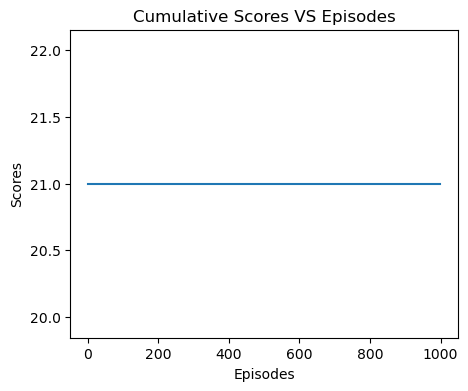

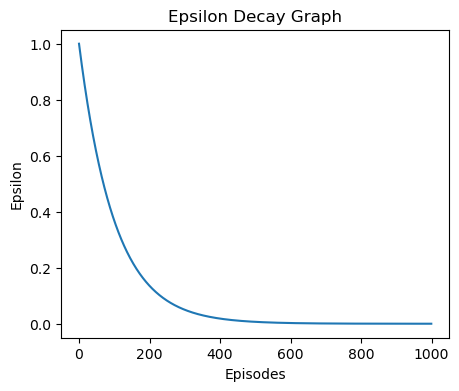

Q1-Table:
[[ 7.73625886e-01  4.06847859e+00  2.13496345e+00  1.88376381e+00]
 [ 2.37439687e+00  1.16413344e+00  1.34202595e+00  1.57723375e+00]
 [ 1.17150163e+00  1.94402899e+00  1.39222401e+00  2.39055083e+00]
 [ 1.66149655e+00  1.48478598e+00  1.80248779e-01  1.11944718e+00]
 [ 2.18059822e+00 -3.06764145e-01  8.03238606e-01  5.18727446e-01]
 [ 2.28763139e-01  5.31366883e-02  5.78845228e-02  1.14348904e+00]
 [ 1.00121632e+00  2.25597003e+00  2.51598601e+00  2.01931114e+00]
 [ 5.27643750e+00  9.35243405e-01  2.67526332e+00  8.53808840e-01]
 [ 4.21430816e+00  1.70246988e+00  1.24535081e+00  2.71232833e+00]
 [-1.26541308e+00  3.65922927e+00  1.19518723e+00  5.12565232e-01]
 [ 4.68761197e+00  4.78643303e-01  7.69448432e-01  1.96525232e+00]
 [-6.76528427e-02  3.02292114e-01 -3.17252259e-02  8.43340934e-01]
 [ 2.41672772e+00  2.22495459e+00  1.45475660e+00  1.91822769e+00]
 [ 9.46928809e-01  5.05875000e+00  2.26155225e+00  7.73979533e-01]
 [ 4.57500000e+00 -1.94282082e+00  1.45485410e+00  2

In [104]:
tomjerry_DQ.gamma = 0.45
tomjerry_DQ.is_greedy = False
tomjerry_DQ.DQ_learning_algo()


tomjerry_DQ.is_greedy=  True
tomjerry_DQ.DQ_learning_algo()

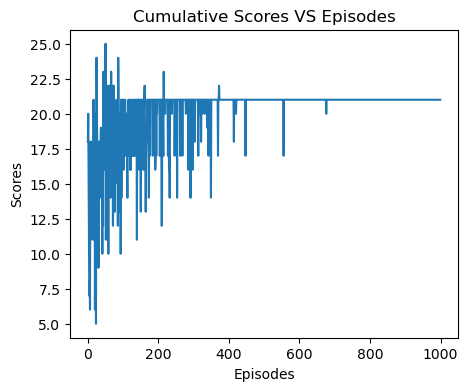

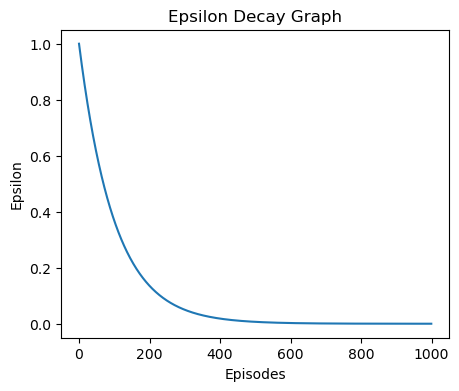

Q1-Table:
[[ 1.23307152e+00  6.26505360e+00  2.89557451e+00  3.10904960e+00]
 [ 5.02315937e+00  2.12950892e+00  2.06275768e+00  2.99051548e+00]
 [ 1.95291379e+00  3.65050333e+00  1.45575148e+00  2.30640062e+00]
 [ 2.68063848e+00  2.30497274e+00  2.54403884e-01  1.42933754e+00]
 [ 3.34597382e+00 -5.47198676e-02  1.27217350e+00  9.49389774e-01]
 [ 7.23287019e-01  3.69327359e-01  3.28790114e-01  2.15385747e+00]
 [ 1.39342083e+00  4.27066602e+00  2.45147914e+00  1.85422410e+00]
 [ 7.72793750e+00  2.04250469e+00  2.89946752e+00  1.45925854e+00]
 [ 5.81906598e+00  2.24103298e+00  1.54710866e+00  3.15585387e+00]
 [-9.28996976e-01  5.87197139e+00  1.17105122e+00  1.50215826e+00]
 [ 6.44237698e+00  9.13762354e-01  1.81119282e+00  2.87254377e+00]
 [ 5.99014119e-01  6.48921168e-01  1.33757012e-01  2.91973342e+00]
 [ 2.73957707e+00  4.01819365e+00  1.46934556e+00  2.05746566e+00]
 [ 2.00672711e+00  7.27375000e+00  3.90337026e+00  1.50303912e+00]
 [ 6.57500000e+00 -8.65779530e-01  2.19371350e+00  3

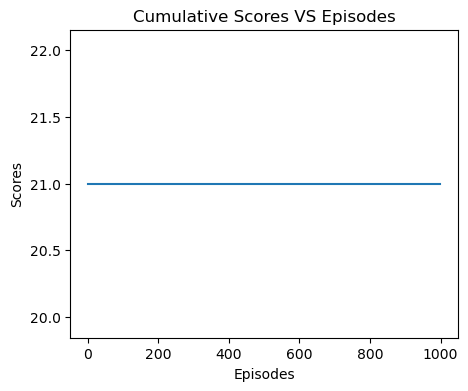

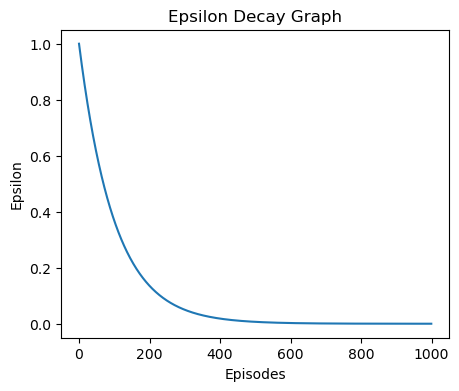

Q1-Table:
[[ 1.23307152e+00  6.26505359e+00  2.89557451e+00  3.10904960e+00]
 [ 5.02315937e+00  2.12950892e+00  2.06275768e+00  2.99051548e+00]
 [ 1.95291379e+00  3.65050333e+00  1.45575148e+00  2.30640062e+00]
 [ 2.68063848e+00  2.30497274e+00  2.54403884e-01  1.42933754e+00]
 [ 3.34597382e+00 -5.47198676e-02  1.27217350e+00  9.49389774e-01]
 [ 7.23287019e-01  3.69327359e-01  3.28790114e-01  2.15385747e+00]
 [ 1.39342083e+00  4.27066602e+00  2.45147914e+00  1.85422410e+00]
 [ 7.72793750e+00  2.04250469e+00  2.89946752e+00  1.45925854e+00]
 [ 5.81906598e+00  2.24103298e+00  1.54710866e+00  3.15585387e+00]
 [-9.28996976e-01  5.87197139e+00  1.17105122e+00  1.50215826e+00]
 [ 6.44237698e+00  9.13762354e-01  1.81119282e+00  2.87254377e+00]
 [ 5.99014119e-01  6.48921168e-01  1.33757012e-01  2.91973342e+00]
 [ 2.73957707e+00  4.01819365e+00  1.46934556e+00  2.05746566e+00]
 [ 2.00672711e+00  7.27375000e+00  3.90337026e+00  1.50303912e+00]
 [ 6.57500000e+00 -8.65779530e-01  2.19371350e+00  3

In [105]:
tomjerry_DQ.gamma = 0.65
tomjerry_DQ.is_greedy = False
tomjerry_DQ.DQ_learning_algo()


tomjerry_DQ.is_greedy=  True
tomjerry_DQ.DQ_learning_algo()

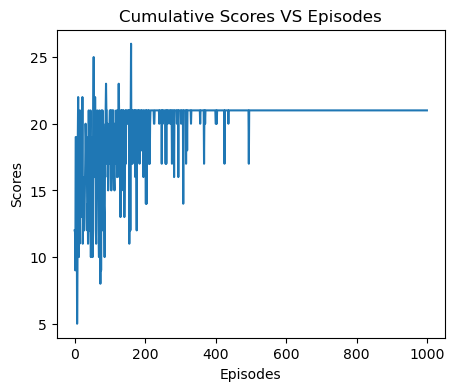

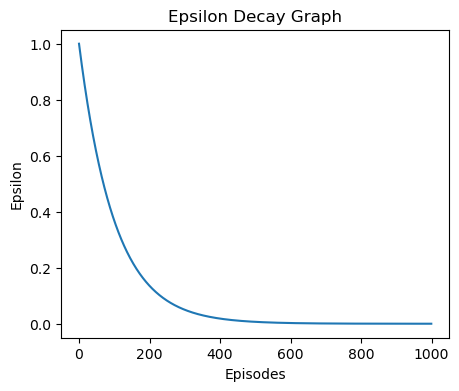

Q1-Table:
[[ 4.70275794 11.90368359  7.281659    6.80350188]
 [10.47492187  4.11953626  7.2235577   6.82617504]
 [ 3.32926641  4.94031873  2.59519416  4.31847892]
 [ 5.23209478  3.63030237  1.26886794  2.06235842]
 [ 5.74513801  0.31624991  2.8814463   1.68747017]
 [ 0.95801336  0.43415212  0.42426653  2.53448539]
 [ 3.41544068  8.56040672  5.13700533  3.39646172]
 [12.3234375   4.95700589  7.16557044  5.02528413]
 [ 8.40230779  3.90123097  2.76703487  4.72471653]
 [ 1.50307697  9.00365032  1.79482167  3.23354926]
 [ 8.07630812  1.70606383  2.98976362  4.46124559]
 [ 1.81567329  1.86608389  0.34334572  4.38962341]
 [ 3.67486304  8.32911383  3.40590264  3.29568268]
 [ 3.72654704 10.96875     7.2806513   5.00783589]
 [ 9.375       1.20291395  5.30404285  6.37620671]
 [ 6.38075589  8.32835128  3.57635647  5.6352826 ]
 [ 9.99978485  2.66295977  5.41131728  3.1304301 ]
 [ 0.61210497  1.96616063  1.23592775  6.0925647 ]
 [ 0.88062668  3.19871098  3.80279716  1.4047895 ]
 [ 1.43382339  7.9912

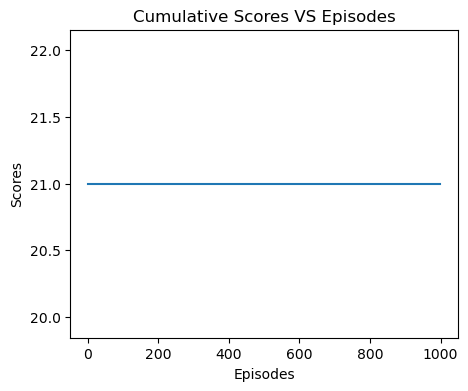

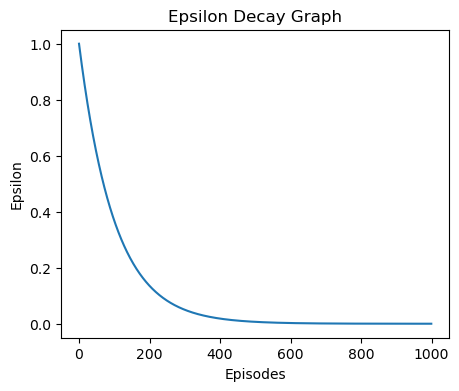

Q1-Table:
[[ 4.70275794 11.90368359  7.281659    6.80350188]
 [10.47492187  4.11953626  7.2235577   6.82617504]
 [ 3.32926641  4.94031873  2.59519416  4.31847892]
 [ 5.23209478  3.63030237  1.26886794  2.06235842]
 [ 5.74513801  0.31624991  2.8814463   1.68747017]
 [ 0.95801336  0.43415212  0.42426653  2.53448539]
 [ 3.41544068  8.56040672  5.13700533  3.39646172]
 [12.3234375   4.95700589  7.16557044  5.02528413]
 [ 8.40230779  3.90123097  2.76703487  4.72471653]
 [ 1.50307697  9.00365032  1.79482167  3.23354926]
 [ 8.07630812  1.70606383  2.98976362  4.46124559]
 [ 1.81567329  1.86608389  0.34334572  4.38962341]
 [ 3.67486304  8.32911383  3.40590264  3.29568268]
 [ 3.72654704 10.96875     7.2806513   5.00783589]
 [ 9.375       1.20291395  5.30404285  6.37620671]
 [ 6.38075589  8.32835128  3.57635647  5.6352826 ]
 [ 9.99978485  2.66295977  5.41131728  3.1304301 ]
 [ 0.61210497  1.96616063  1.23592775  6.0925647 ]
 [ 0.88062668  3.19871098  3.80279716  1.4047895 ]
 [ 1.43382339  7.9912

In [106]:
tomjerry_DQ.gamma = 0.85
tomjerry_DQ.is_greedy = False
tomjerry_DQ.DQ_learning_algo()


tomjerry_DQ.is_greedy=  True
tomjerry_DQ.DQ_learning_algo()

# Hyper parameter tuning using decay values -> [0.001,0.009,0.05] 

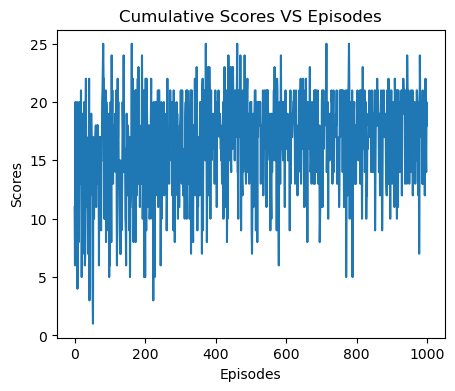

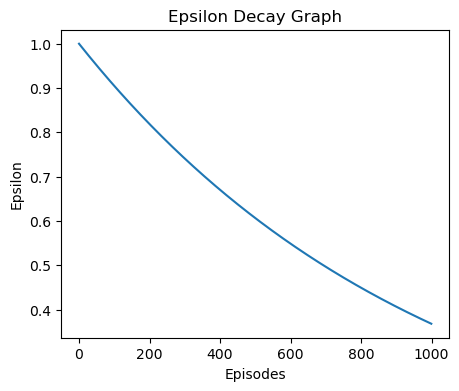

Q1-Table:
[[ 6.70279591  9.58501707  8.29348941  8.36301271]
 [ 8.50762585  7.30112852  7.57010174  8.34142142]
 [ 6.83626046  8.16846275  7.40292469  7.05592886]
 [ 7.26769642  7.23435617  6.12804403  7.25029882]
 [ 7.56238308  4.44375705  7.02131401  6.53643273]
 [ 5.62512274  4.76123026  4.52566693  7.03930305]
 [ 6.21749906  8.50405849  7.98966879  7.3945058 ]
 [ 9.83339588  6.71932374  7.84316476  7.18751455]
 [ 8.6925238   7.21837381  7.30041224  8.58998939]
 [ 4.05239044  9.37222618  6.68620252  6.88144226]
 [ 8.49999999  6.23251224  7.32145321  8.01963301]
 [ 6.11197901  5.70087135  4.26540969  7.45240573]
 [ 7.67417894  8.19922057  7.10639404  6.99155588]
 [ 6.14222491  9.76644433  8.60410143  6.3645249 ]
 [ 8.73731355  2.26584088  7.06938019  8.52477821]
 [ 7.7222534   8.5         7.40856231  7.37777388]
 [10.          6.20994486  8.71147618  5.82792125]
 [ 4.72691646  6.47031321  5.55116025  8.48995001]
 [ 5.11402518  6.18511214  6.71049557  5.44285273]
 [ 5.25873387  7.7317

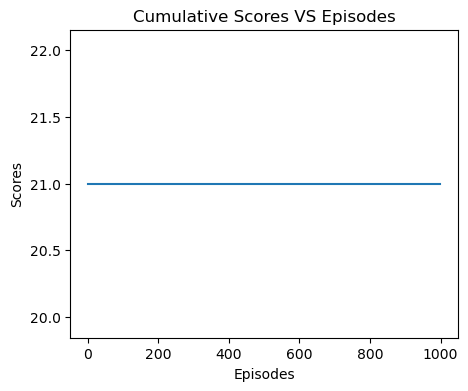

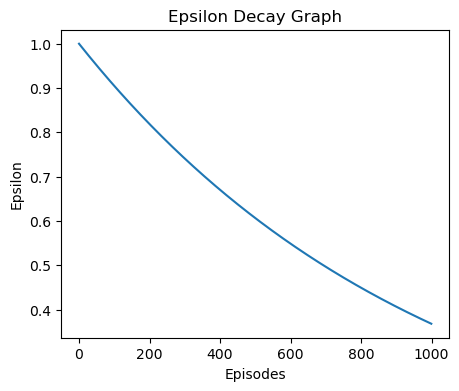

Q1-Table:
[[ 6.70279591 11.90368359  8.29348941  8.36301271]
 [10.3128357   7.30112852  7.57010174  8.34142142]
 [ 6.83626046  8.16846275  7.40292469  7.05592886]
 [ 7.26769642  7.23435617  6.12804403  7.25029882]
 [ 7.56238308  4.44375705  7.02131401  6.53643273]
 [ 5.62512274  4.76123026  4.52566693  7.03930305]
 [ 6.21749906  8.50405849  7.98966879  7.3945058 ]
 [12.3234375   6.71932374  7.84316476  7.18751455]
 [ 8.6925238   7.21837381  7.30041224  8.58998939]
 [ 4.05239044  9.37222618  6.68620252  6.88144226]
 [ 8.49999999  6.23251224  7.32145321  8.01963301]
 [ 6.11197901  5.70087135  4.26540969  7.45240573]
 [ 7.67417894  8.19922057  7.10639404  6.99155588]
 [ 6.14222491 10.74440927  8.60410143  6.3645249 ]
 [ 9.375       2.26584088  7.06938019  8.52477821]
 [ 7.7222534   8.5         7.40856231  7.37777388]
 [10.          6.20994486  8.71147618  5.82792125]
 [ 4.72691646  6.47031321  5.55116025  8.48995001]
 [ 5.11402518  6.18511214  6.71049557  5.44285273]
 [ 5.25873387  7.7317

In [107]:
tomjerry_DQ.decay = 0.001
tomjerry_DQ.is_greedy = False
tomjerry_DQ.DQ_learning_algo()


tomjerry_DQ.is_greedy=  True
tomjerry_DQ.DQ_learning_algo()

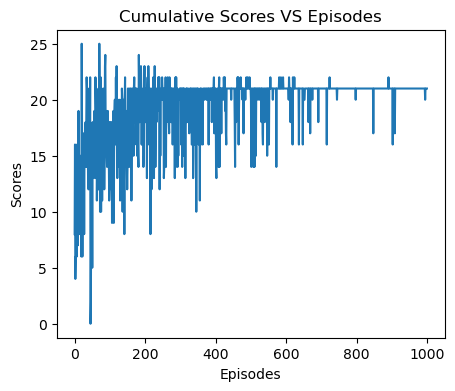

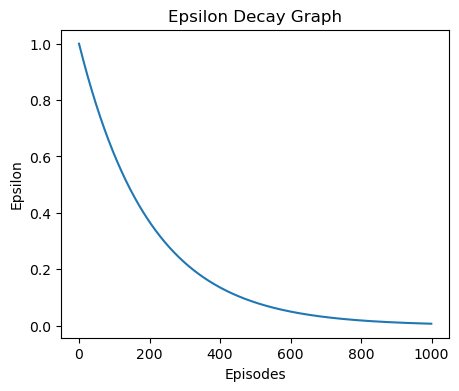

Q1-Table:
[[ 6.62999628 11.90066138  8.42402031  8.43234408]
 [10.3764981   7.30389607  7.98106078  8.65909491]
 [ 7.19640839  8.95379553  6.8335791   7.6878375 ]
 [ 7.40811122  7.12667484  6.04513323  6.72073899]
 [ 8.16913488  4.64872794  7.0204733   6.53218876]
 [ 5.88517056  5.26431952  4.9273811   7.05766235]
 [ 6.81444635  9.62623668  7.85633672  7.37513853]
 [12.32323114  6.8223202   7.85864184  6.83730703]
 [ 8.59536733  7.19764866  6.85556503  8.13174276]
 [ 3.96746796  9.91562084  7.07821163  6.91956825]
 [ 8.5         6.19552046  7.22837359  7.72096769]
 [ 6.35037566  5.92860655  4.59457935  7.59636233]
 [ 7.9160898   9.07940718  6.80101295  7.45572772]
 [ 6.16480275 10.85804923  8.98086144  6.64728851]
 [ 9.37500226  2.3318133   6.98447516  8.49863184]
 [ 7.65900552  8.5         7.22531243  7.61512204]
 [10.          6.56541991  8.34406023  5.72351839]
 [ 5.53280946  6.93083064  5.9055471   8.49832395]
 [ 5.3691597   6.53892867  6.45087002  5.75729587]
 [ 5.36244639  7.4089

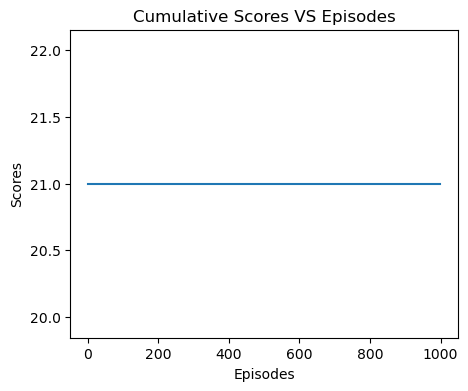

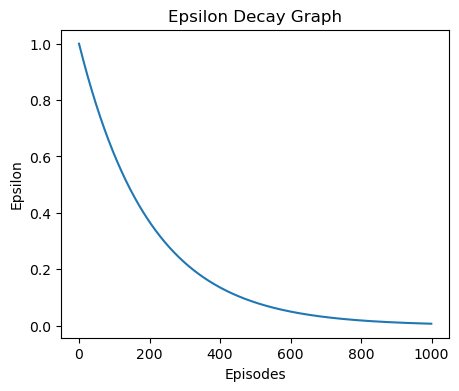

Q1-Table:
[[ 6.62999628 11.90368359  8.42402031  8.43234408]
 [10.39605784  7.30389607  7.98106078  8.65909491]
 [ 7.19640839  8.95379553  6.8335791   7.6878375 ]
 [ 7.40811122  7.12667484  6.04513323  6.72073899]
 [ 8.16913488  4.64872794  7.0204733   6.53218876]
 [ 5.88517056  5.26431952  4.9273811   7.05766235]
 [ 6.81444635  9.62623668  7.85633672  7.37513853]
 [12.3234375   6.8223202   7.85864184  6.83730703]
 [ 8.59536733  7.19764866  6.85556503  8.13174276]
 [ 3.96746796  9.91562084  7.07821163  6.91956825]
 [ 8.5         6.19552046  7.22837359  7.72096769]
 [ 6.35037566  5.92860655  4.59457935  7.59636233]
 [ 7.9160898   9.07940718  6.80101295  7.45572772]
 [ 6.16480275 10.85959562  8.98086144  6.64728851]
 [ 9.375       2.3318133   6.98447516  8.49863184]
 [ 7.65900552  8.5         7.22531243  7.61512204]
 [10.          6.56541991  8.34406023  5.72351839]
 [ 5.53280946  6.93083064  5.9055471   8.49832395]
 [ 5.3691597   6.53892867  6.45087002  5.75729587]
 [ 5.36244639  7.4089

In [108]:
tomjerry_DQ.decay = 0.005
tomjerry_DQ.is_greedy = False
tomjerry_DQ.DQ_learning_algo()


tomjerry_DQ.is_greedy=  True
tomjerry_DQ.DQ_learning_algo()

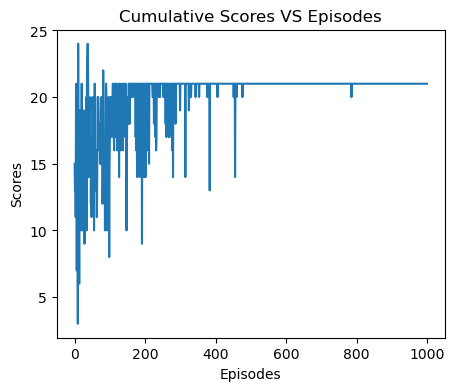

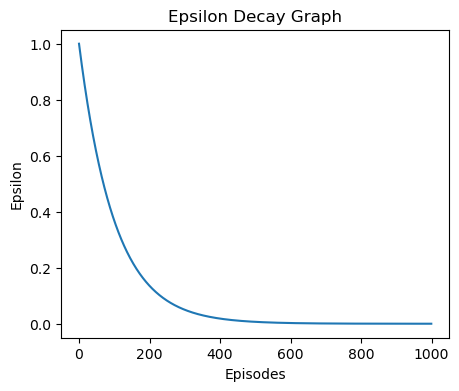

Q1-Table:
[[ 6.65603489 11.8892581   8.50601289  8.10459494]
 [10.47492188  7.59315228  7.33916025  7.94019361]
 [ 7.00072191  8.83978956  7.36467378  7.86551421]
 [ 7.48521845  7.11322626  6.22916267  7.04100923]
 [ 8.07490818  4.99152819  7.05422946  6.96317189]
 [ 6.1271379   5.46036315  5.17888332  7.07917748]
 [ 6.46807529  9.2912843   8.15640238  7.77089545]
 [12.30347142  6.48576854  8.10669691  6.72308703]
 [ 8.52189983  7.56030989  7.32877238  9.5030459 ]
 [ 4.60621426  9.54489479  6.74279362  7.2767612 ]
 [ 8.5         6.38409208  7.25677226  8.00632331]
 [ 6.41646726  6.02555091  4.79059949  7.46865082]
 [ 7.64445152  8.86488785  7.27811876  7.32577955]
 [ 5.7999003  10.96875     9.24730283  6.55481231]
 [ 9.34736529  2.87061759  6.6553778   8.14651213]
 [ 7.65779282  8.5         7.44610057  7.59876873]
 [10.          6.57476264  8.06024304  6.23987792]
 [ 5.94414718  7.08399137  6.04483979  8.49901031]
 [ 5.33292625  6.49902836  6.77062864  5.74033298]
 [ 5.47311217  7.7422

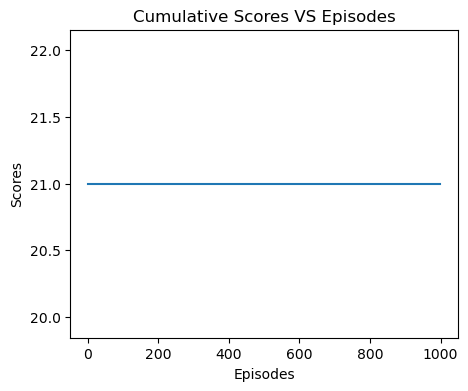

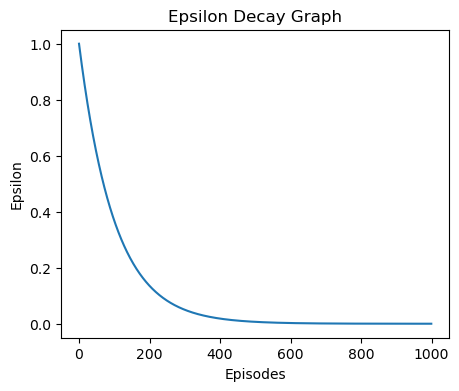

Q1-Table:
[[ 6.65603489 11.8892581   8.50601289  8.10459494]
 [10.47492188  7.59315228  7.33916025  7.94019361]
 [ 7.00072191  8.83978956  7.36467378  7.86551421]
 [ 7.48521845  7.11322626  6.22916267  7.04100923]
 [ 8.07490818  4.99152819  7.05422946  6.96317189]
 [ 6.1271379   5.46036315  5.17888332  7.07917748]
 [ 6.46807529  9.2912843   8.15640238  7.77089545]
 [12.30347142  6.48576854  8.10669691  6.72308703]
 [ 8.52189983  7.56030989  7.32877238  9.5030459 ]
 [ 4.60621426  9.54489479  6.74279362  7.2767612 ]
 [ 8.5         6.38409208  7.25677226  8.00632331]
 [ 6.41646726  6.02555091  4.79059949  7.46865082]
 [ 7.64445152  8.86488785  7.27811876  7.32577955]
 [ 5.7999003  10.96875     9.24730283  6.55481231]
 [ 9.34736529  2.87061759  6.6553778   8.14651213]
 [ 7.65779282  8.5         7.44610057  7.59876873]
 [10.          6.57476264  8.06024304  6.23987792]
 [ 5.94414718  7.08399137  6.04483979  8.49901031]
 [ 5.33292625  6.49902836  6.77062864  5.74033298]
 [ 5.47311217  7.7422

In [109]:
tomjerry_DQ.decay = 0.01
tomjerry_DQ.is_greedy = False
tomjerry_DQ.DQ_learning_algo()


tomjerry_DQ.is_greedy=  True
tomjerry_DQ.DQ_learning_algo()

# Dynamic reward graph

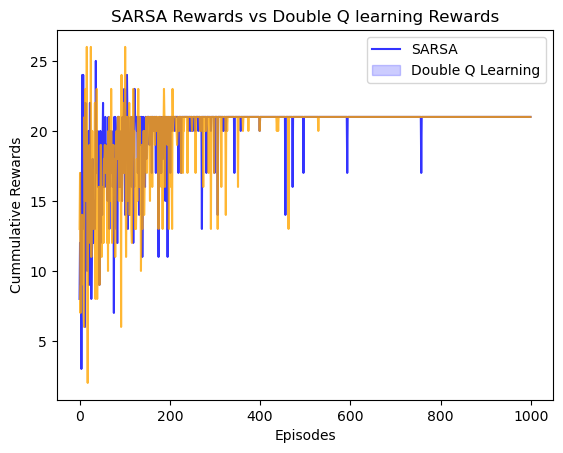

In [38]:
def dynamics_points_graph(DQ_learning_scores, SARSA_scores):
    sns.lineplot(data=[DQ_learning_scores, SARSA_scores], palette=['blue', 'orange'], alpha=0.8, markers=False, dashes=False)
    plt.xlabel('Episodes')
    plt.ylabel('Cummulative Rewards')
    plt.title('SARSA Rewards vs Double Q learning Rewards')
    plt.legend(['SARSA', 'Double Q Learning'])
    plt.show()

dynamics_points_graph(tomjerry_sarsa.spoints,tomjerry_DQ.DQpoints)


# Bonus Bootstrapping

In [36]:
class NStepSarsaAgent(SarsaAgentImplementation):
    def __init__(self, tomjerry, decay=0.01, lr=0.1, gamma=0.99, ini_epi=1, fin_epi=0,
                 is_greedy=False, episodes_total=700, n_steps=2):
        super().__init__(tomjerry, decay, lr, gamma, ini_epi, fin_epi, is_greedy, episodes_total)
        self.n_steps = n_steps

    def n_step_sarsa_algo(self):
        epiList = []
        cumScore = []
        episode = 0

        while episode < self.episodesTotal:
            self.tomjerry.reset()
            action_list = []

            state = 0
            reaching_goal = False
            score = 0
            cat = []
            p = []
            cat.append(self.tomjerry.position_of_jerry)
            epi = self.fin_epi + (self.ini_epi - self.fin_epi) * np.exp(-self.decay * episode)

            act = np.argmax(self.qTable[state]) if self.is_greedy or np.any(np.random.uniform(0, 1) > epi) else self.tomjerry.number_actions.sample()
            action_list.append(act)

            for steps in range(self.tomjerry.maximum_steps + 1):
                state_, goal, points, completed, truncated = self.tomjerry.step(act)
                score += points
                p.append(points)

                if steps < self.tomjerry.maximum_steps:
                    act_ = np.argmax(self.qTable[state_]) if self.is_greedy or np.any(np.random.uniform(0, 1) > epi) else self.tomjerry.number_actions.sample()
                else:
                    act_ = None

                self.qTable[state, act] = self.qTable[state, act] + self.lr * (
                        points + self.gamma * self.q_values_n_steps(state_, act_, steps) - self.qTable[state, act])

                act = act_
                state = state_
                action_list.append(act)
                cat.append(self.tomjerry.position_of_jerry)

                if goal:
                    reaching_goal = True
                    break

            epiList.append(epi)
            cumScore.append(score+8)
            episode += 1

        if not self.is_greedy:
            self.spoints = cumScore

        self.plot_cumScore(cumScore)
        self.plot_epiDecay(epiList)
        self.qtable()

    def q_values_n_steps(self, state, action, steps):
        total_reward = 0
        discount_factor = 1.0

        for i in range(min(self.n_steps, self.tomjerry.maximum_steps - steps)):
            next_state, _, points, _, _ = self.tomjerry.step(action)
            total_reward += discount_factor * points
            discount_factor *= self.gamma
            state = next_state

        return total_reward


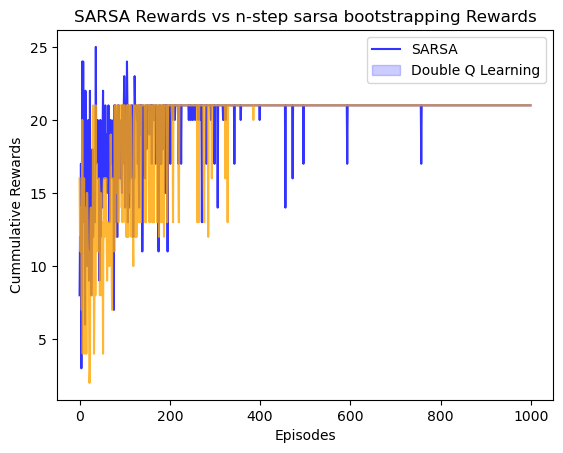

In [37]:
def dynamics_points_graph(DQ_learning_scores, SARSA_scores):
    sns.lineplot(data=[DQ_learning_scores, SARSA_scores], palette=['blue', 'orange'], alpha=0.8, markers=False, dashes=False)
    plt.xlabel('Episodes')
    plt.ylabel('Cummulative Rewards')
    plt.title('SARSA Rewards vs n-step sarsa bootstrapping Rewards')
    plt.legend(['SARSA', 'Double Q Learning'])
    plt.show()

dynamics_points_graph(tomjerry_sarsa.spoints, tomjerry_n_step_sarsa.spoints)


# Bonus - Grid world environment

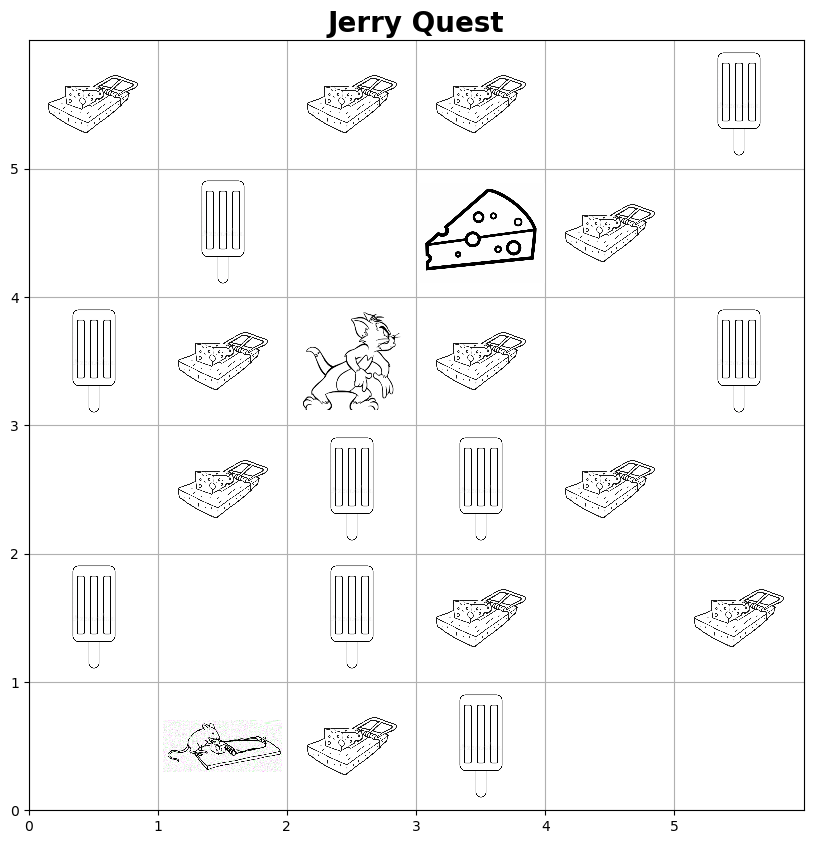

In [39]:
actdic = {0:"right", 2:"left", 1: "up", 3:"down"}
tomjerry = TomJerryEnvironment(def_env_type='deterministic',n=36,maximum_tsteps=50)
tomjerry.step(0)# taking right getting trapped by rat trap
tomjerry.render(plot=True)

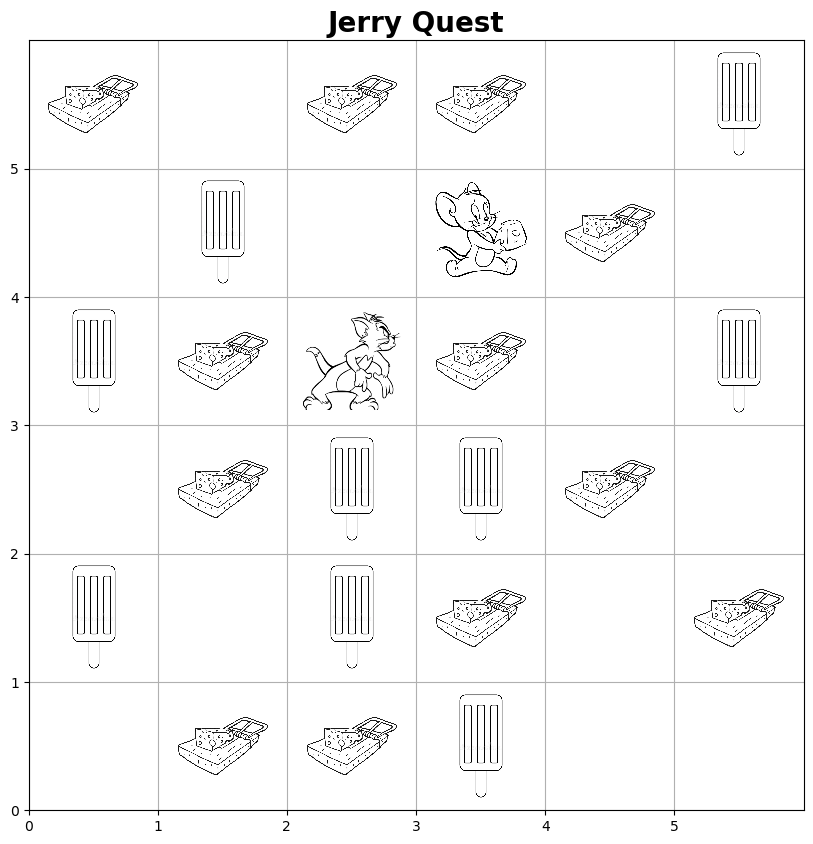

In [40]:
#Jerry reached cheese its goal.
for i in range(4):
    tomjerry.step(1)
for i in range(2):
    tomjerry.step(0)
tomjerry.render(plot=True)

Jerry Killed and game starts again


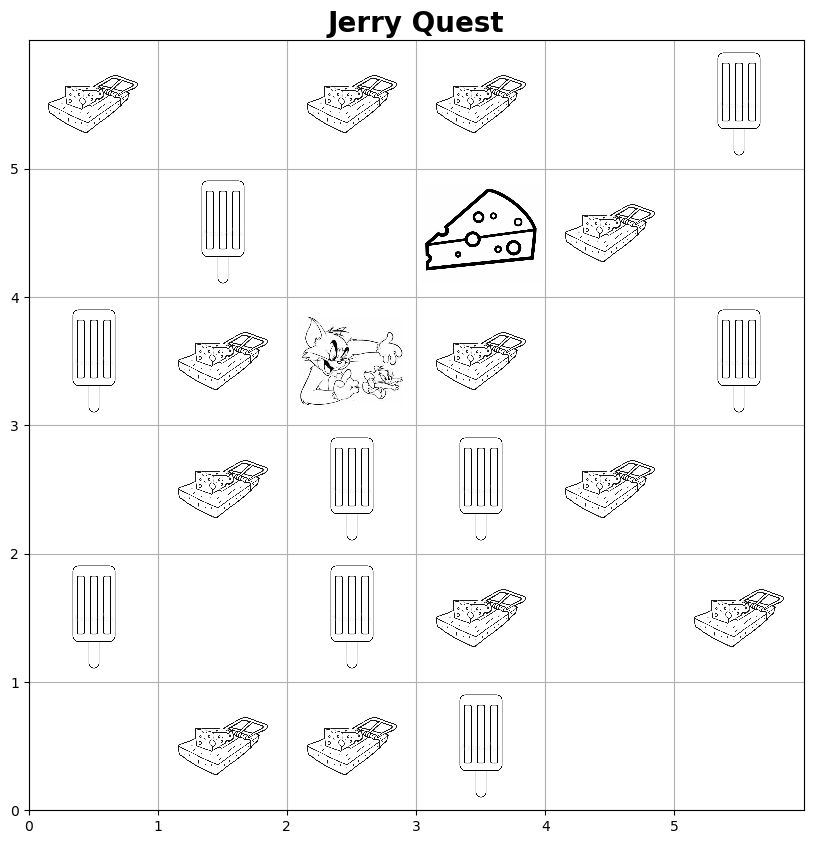

In [41]:
tomjerry.step(2)
tomjerry.step(3)
tomjerry.render(plot=True)

# References

https://ubuffalo-my.sharepoint.com/:f:/g/personal/avereshc_buffalo_edu/EggefMmXcsBLr_5hfvDVgo0BGFUhfJeKlhXM8-8RhstHeQ?e=ZP5Fks 
https://ubuffalo-my.sharepoint.com/:f:/g/personal/avereshc_buffalo_edu/EukPAiqkHV9FlJBZtB349tsBYhvyPXS71xwA41eVVQjnZg?e=XnJmUy